# S-Curve Scan with Qinj

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
from fnmatch import fnmatch
import hist
from hist import Hist
import scipy.stats as stats

In [12]:
QInjEns = [5, 6, 10, 15, 20, 25, 30]
thresholds = {5:np.arange(50,110,2),
              6:np.arange(50,110,2),
              10:np.arange(50,150,2),
              15:np.arange(50,180,2),
              20:np.arange(50,230,2),
              25:np.arange(50,270,2),
              30:np.arange(50,310,2)
}
row_list = [14,15]
col_list = [9, 9]
scan_list = list(zip(row_list, col_list))
print(scan_list)

[(14, 9), (15, 9)]


In [65]:
def return_empty_list():
    return {(row,col):{q:{DAC:0 for DAC in thresholds[q]}for q in QInjEns}for row,col in scan_list}
def return_simple_empty_list():
    return {(row,col):[] for row,col in scan_list}

In [68]:
# h = {(row,col):{q:{DAC:(
#         Hist.new.Integer(125, 165, name="CAL", label="CAL [LSB]")
#         .Integer(45, 85, name="TOT", label="TOT [LSB]")
#         .Integer(150, 275, name="TOA", label="TOA [LSB]")
#         .Double()
#       )
#       for DAC in thresholds[q]}
#      for q in QInjEns}
#     for row,col in scan_list}
hit_counts = return_empty_list()
CAL_sum = return_empty_list()
CAL_sum_sq = return_empty_list()
TOA_sum = return_empty_list()
TOA_sum_sq = return_empty_list()
TOT_sum = return_empty_list()
TOT_sum_sq = return_empty_list()
del_ = return_simple_empty_list()
toa_ = return_simple_empty_list()
tot_ = return_simple_empty_list()
cal_ = return_simple_empty_list()
qin_ = return_simple_empty_list()

In [69]:
root = '../ETROC-Data'
file_pattern = "*translated*.dat"
for index, row, col in zip((range(len(row_list))), row_list, col_list):
    for QInj in (QInjEns):
        for idx_DAC,DAC in enumerate(thresholds[QInj]):
            print(f'Pixel {col},{row} - {QInj} fC - DAC {DAC}')
            path_pattern = f"*2023-06-14_Array_Test_Results/E2_testing_VRef_SCurve_Pixel_C{col}_R{row}_QInj_{QInj}_Threshold_{DAC}"
            file_list = []
            for path, subdirs, files in os.walk(root):
                if not fnmatch(path, path_pattern): continue
                for name in files:
                    pass
                    if fnmatch(name, file_pattern):
                        file_list.append(os.path.join(path, name))
                        print(file_list[-1])
            current_bcid = -1
            previous_bcid = -1
            total_files = len(file_list)
            for file_index, file_name in enumerate(file_list):
                print(f"{file_index+1}/{total_files}")
                with open(file_name) as infile:
                    for line in infile:
                        text_list = line.split()
                        if(text_list[2]=="HEADER"): current_bcid = int(text_list[8])
                        elif(text_list[2]=="TRAILER"): previous_bcid = current_bcid
                        # if(previous_bcid==-1 or (current_bcid-previous_bcid==68 if current_bcid>=previous_bcid else current_bcid+3564-previous_bcid==68)): continue
                        # if((current_bcid-previous_bcid!=1054 if current_bcid>=previous_bcid else current_bcid+3564-previous_bcid!=1054)): continue
                        if text_list[2]!="DATA": continue
                        c_running = int(text_list[6])
                        r_running = int(text_list[8])
                        if(c_running!=col or r_running!=row): continue
                        TOA = int(text_list[10])
                        TOT = int(text_list[12])
                        CAL = int(text_list[14])
                        if(CAL>200 or CAL<100): continue
                        CAL_sum[(r_running,c_running)][QInj][DAC] += CAL
                        CAL_sum_sq[(r_running,c_running)][QInj][DAC] += CAL*CAL
                        TOA_sum[(r_running,c_running)][QInj][DAC] += TOA
                        TOA_sum_sq[(r_running,c_running)][QInj][DAC] += TOA*TOA
                        TOT_sum[(r_running,c_running)][QInj][DAC] += TOT
                        TOT_sum_sq[(r_running,c_running)][QInj][DAC] += TOT*TOT
                        # h[(r_running,c_running)][QInj][DAC].fill(CAL,TOT,TOA)
                        hit_counts[(r_running,c_running)][QInj][DAC] += 1 
                        del_[(r_running,c_running)].append(DAC)
                        tot_[(r_running,c_running)].append(TOT)
                        toa_[(r_running,c_running)].append(TOA)
                        cal_[(r_running,c_running)].append(CAL)
                        qin_[(r_running,c_running)].append(QInj)
    del_[(r_running,c_running)] = np.array(del_[(r_running,c_running)])
    tot_[(r_running,c_running)] = np.array(tot_[(r_running,c_running)])
    toa_[(r_running,c_running)] = np.array(toa_[(r_running,c_running)])
    cal_[(r_running,c_running)] = np.array(cal_[(r_running,c_running)])
    qin_[(r_running,c_running)] = np.array(qin_[(r_running,c_running)])

Pixel 9,14 - 5 fC - DAC 50
../ETROC-Data/2023-06-14_Array_Test_Results/E2_testing_VRef_SCurve_Pixel_C9_R14_QInj_5_Threshold_50/TDC_Data_translated_0.dat
1/1
Pixel 9,14 - 5 fC - DAC 52
../ETROC-Data/2023-06-14_Array_Test_Results/E2_testing_VRef_SCurve_Pixel_C9_R14_QInj_5_Threshold_52/TDC_Data_translated_0.dat
1/1
Pixel 9,14 - 5 fC - DAC 54
../ETROC-Data/2023-06-14_Array_Test_Results/E2_testing_VRef_SCurve_Pixel_C9_R14_QInj_5_Threshold_54/TDC_Data_translated_0.dat
1/1
Pixel 9,14 - 5 fC - DAC 56
../ETROC-Data/2023-06-14_Array_Test_Results/E2_testing_VRef_SCurve_Pixel_C9_R14_QInj_5_Threshold_56/TDC_Data_translated_1.dat
../ETROC-Data/2023-06-14_Array_Test_Results/E2_testing_VRef_SCurve_Pixel_C9_R14_QInj_5_Threshold_56/TDC_Data_translated_0.dat
1/2
2/2
Pixel 9,14 - 5 fC - DAC 58
../ETROC-Data/2023-06-14_Array_Test_Results/E2_testing_VRef_SCurve_Pixel_C9_R14_QInj_5_Threshold_58/TDC_Data_translated_1.dat
../ETROC-Data/2023-06-14_Array_Test_Results/E2_testing_VRef_SCurve_Pixel_C9_R14_QInj_5_Th

In [70]:
CAL_mean = return_empty_list()
CAL_std = return_empty_list()
TOA_mean = return_empty_list()
TOA_std = return_empty_list()
TOT_mean = return_empty_list()
TOT_std = return_empty_list()
for index, row, col in zip((range(len(row_list))), row_list, col_list):
    for QInj in (QInjEns):
        for DAC in (thresholds[QInj]):
            if(hit_counts[(row,col)][QInj][DAC]==0): 
                CAL_mean[(row,col)][QInj][DAC] = np.nan
                CAL_std[(row,col)][QInj][DAC] = np.nan
                TOA_std[(row,col)][QInj][DAC] = np.nan
                TOT_mean[(row,col)][QInj][DAC] = np.nan
                TOT_std[(row,col)][QInj][DAC] = np.nan
                continue
            CAL_mean[(row,col)][QInj][DAC] = CAL_sum[(row,col)][QInj][DAC]/hit_counts[(row,col)][QInj][DAC]
            CAL_std[(row,col)][QInj][DAC] = np.sqrt((CAL_sum_sq[(row,col)][QInj][DAC]/hit_counts[(row,col)][QInj][DAC]) - pow(CAL_mean[(row,col)][QInj][DAC], 2))
            TOA_mean[(row,col)][QInj][DAC] = TOA_sum[(row,col)][QInj][DAC]/hit_counts[(row,col)][QInj][DAC]
            TOA_std[(row,col)][QInj][DAC] = np.sqrt((TOA_sum_sq[(row,col)][QInj][DAC]/hit_counts[(row,col)][QInj][DAC]) - pow(TOA_mean[(row,col)][QInj][DAC], 2))
            TOT_mean[(row,col)][QInj][DAC] = TOT_sum[(row,col)][QInj][DAC]/hit_counts[(row,col)][QInj][DAC]
            TOT_std[(row,col)][QInj][DAC] = np.sqrt((TOT_sum_sq[(row,col)][QInj][DAC]/hit_counts[(row,col)][QInj][DAC]) - pow(TOT_mean[(row,col)][QInj][DAC], 2))

In [33]:
BL_map_THCal = return_empty_list()
NW_map_THCal = return_empty_list()
info_THCal = return_empty_list()
root = '../ETROC-Data'
for index, row, col in zip((range(len(row_list))), row_list, col_list):
    for QInj in (QInjEns):
        for DAC in (thresholds[QInj]):
            path = f'/2023-06-14_Array_Test_Results/E2_testing_VRef_SCurve_Pixel_C{col}_R{row}_QInj_{QInj}_Threshold_{DAC}/'
            print(f'Pixel {col},{row} - {QInj} fC - DAC {DAC}')
            file_pattern = "info"
            info = np.load(root+path+file_pattern+".pkl",allow_pickle=True)
            print(info)
            info_THCal[(row,col)][QInj][DAC] = info
            BL_map_THCal[(row,col)][QInj][DAC] = info['BL']
            NW_map_THCal[(row,col)][QInj][DAC] = info['NW']
            # BL_map_THCal[(row,col)][QInj][DAC] = np.load(root+path+file_pattern+"_BL.npy")
            # NW_map_THCal[(row,col)][QInj][DAC] = np.load(root+path+file_pattern+"_NW.npy")

Pixel 9,14 - 5 fC - DAC 50
{'BL': 57.0, 'NW': 7.0, 'row': 14, 'col': 9, 'charge': 5, 'threshold': 50, 'time': datetime.datetime(2023, 6, 14, 13, 57, 39, 752693)}
Pixel 9,14 - 5 fC - DAC 52
{'BL': 66.0, 'NW': 7.0, 'row': 14, 'col': 9, 'charge': 5, 'threshold': 52, 'time': datetime.datetime(2023, 6, 14, 13, 57, 57, 44804)}
Pixel 9,14 - 5 fC - DAC 54
{'BL': 69.0, 'NW': 7.0, 'row': 14, 'col': 9, 'charge': 5, 'threshold': 54, 'time': datetime.datetime(2023, 6, 14, 13, 58, 14, 107206)}
Pixel 9,14 - 5 fC - DAC 56
{'BL': 56.0, 'NW': 6.0, 'row': 14, 'col': 9, 'charge': 5, 'threshold': 56, 'time': datetime.datetime(2023, 6, 14, 13, 58, 30, 919531)}
Pixel 9,14 - 5 fC - DAC 58
{'BL': 69.0, 'NW': 7.0, 'row': 14, 'col': 9, 'charge': 5, 'threshold': 58, 'time': datetime.datetime(2023, 6, 14, 13, 58, 48, 372830)}
Pixel 9,14 - 5 fC - DAC 60
{'BL': 56.0, 'NW': 5.0, 'row': 14, 'col': 9, 'charge': 5, 'threshold': 60, 'time': datetime.datetime(2023, 6, 14, 13, 59, 5, 217624)}
Pixel 9,14 - 5 fC - DAC 62
{'B

## S-Curve Plots

In [49]:
def turning_point(key_array, array):
    return np.argmax(np.where(key_array>50, array, 0))
def starting_point(key_array, array, BL, NW):
    return np.argmin(np.where(array>BL+NW, array, np.inf))

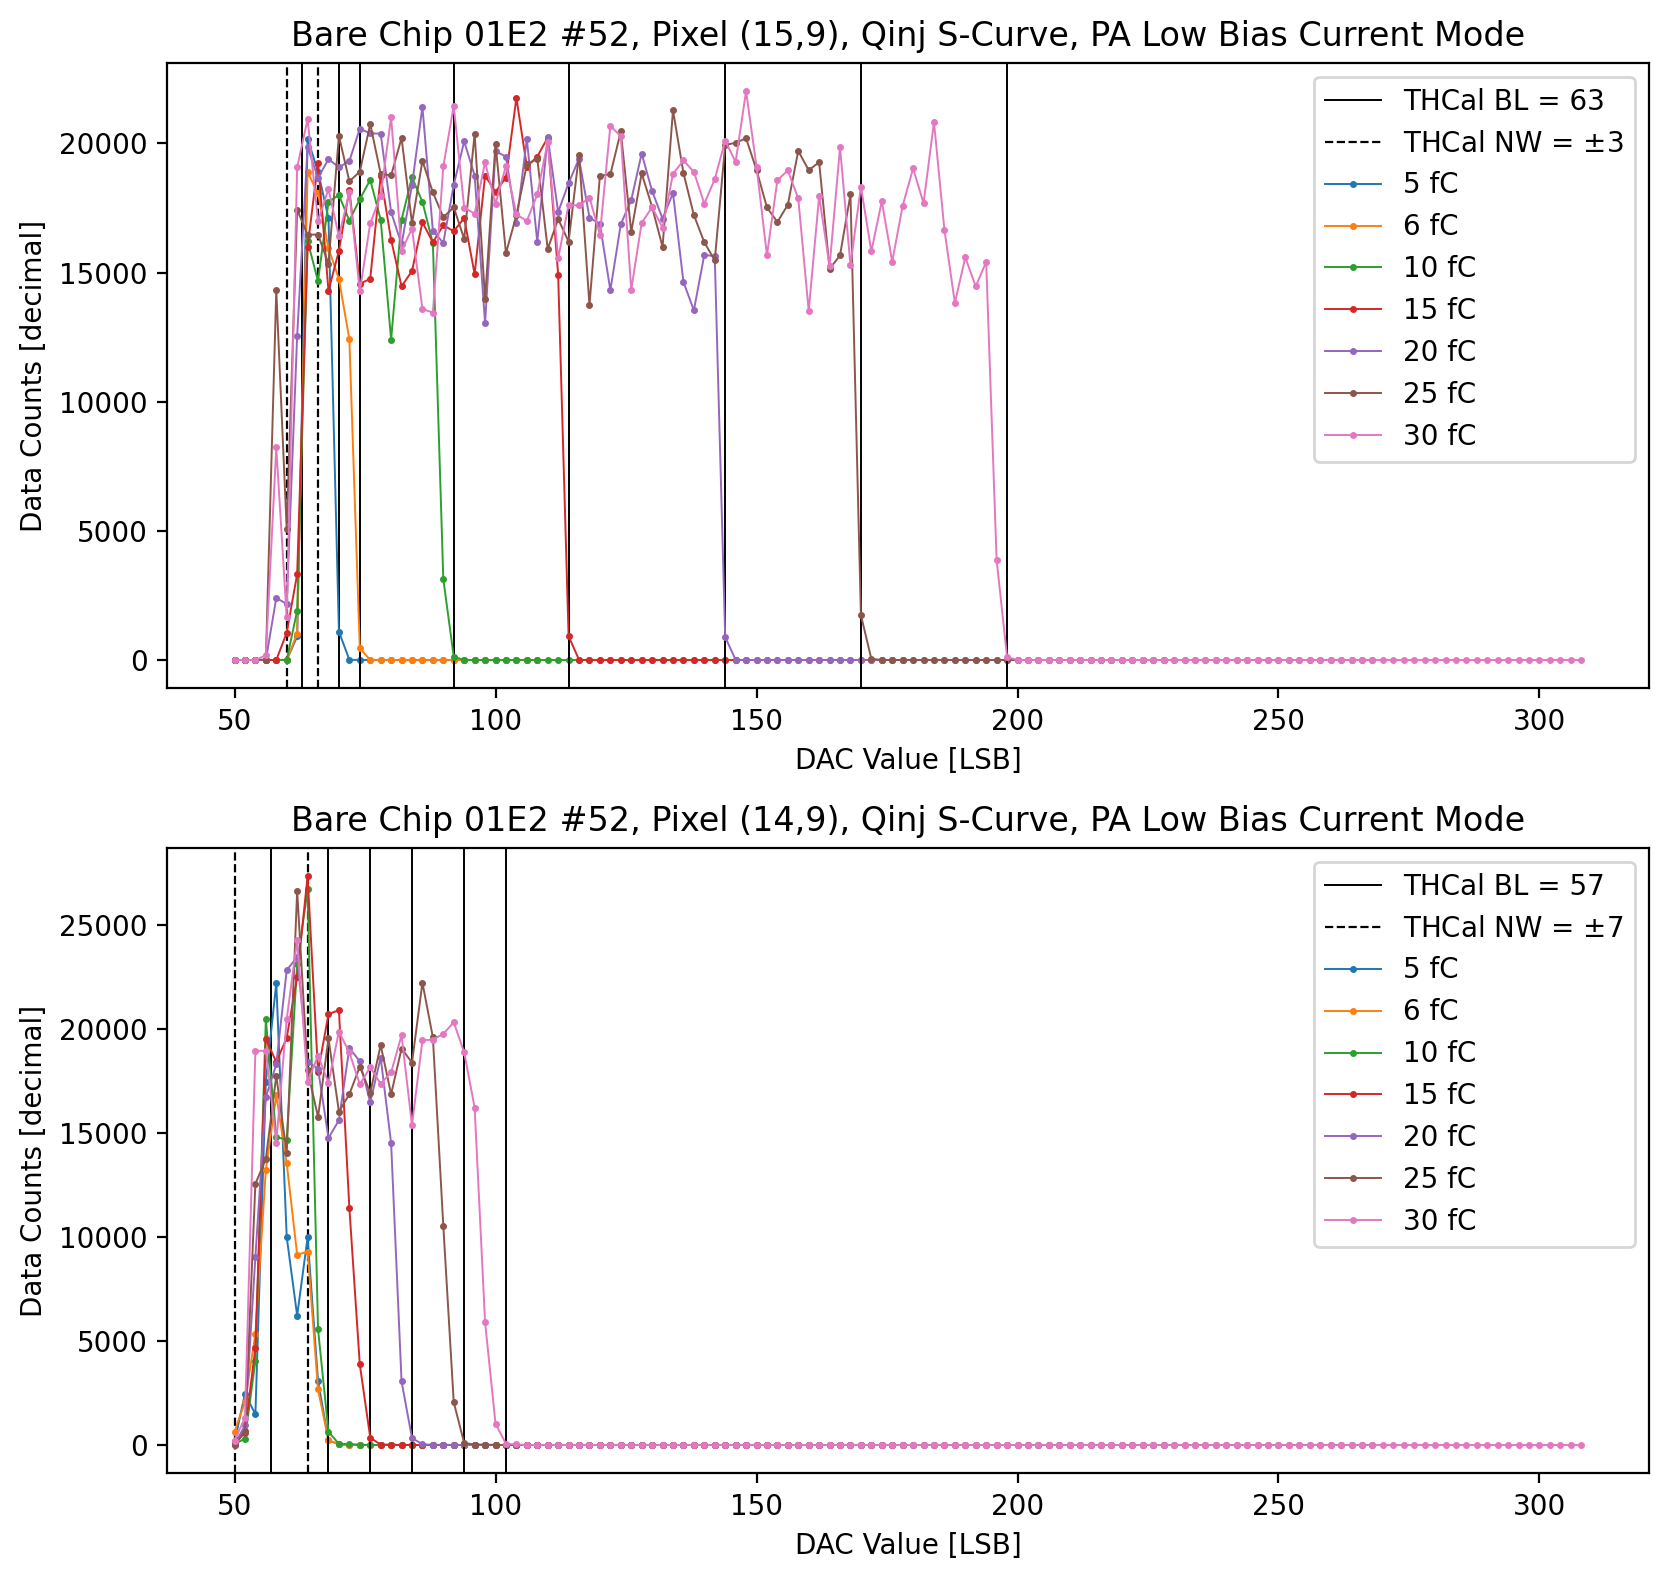

In [40]:
fig = plt.figure(dpi=200, figsize=(16,8))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        ax0.axvline(BL_map_THCal[(row,col)][5][50], color='k', lw=0.7, label=f"THCal BL = {int(BL_map_THCal[(row,col)][5][50])}")
        ax0.axvline(BL_map_THCal[(row,col)][5][50]+NW_map_THCal[(row,col)][5][50], color='k',ls="--", lw=0.8, label=f"THCal NW = $\pm${int(NW_map_THCal[(row,col)][5][50])}")
        ax0.axvline(BL_map_THCal[(row,col)][5][50]-NW_map_THCal[(row,col)][5][50], color='k',ls="--", lw=0.8)
        # ax0.axvline(thresholds[QInj][15], color='k', lw=0.7)
        for QInj in QInjEns:
            tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
            ax0.axvline(thresholds[QInj][tp_idx], color='k', lw=0.7)
            ax0.plot(thresholds[QInj], hit_counts[(row,col)][QInj].values(), '.-', label=f"{QInj} fC", lw=0.7, markersize=3)
        ax0.set_xlabel("DAC Value [LSB]")
        ax0.set_ylabel("Data Counts [decimal]")
        plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figures/multipixel_scurve.pdf")
plt.show()

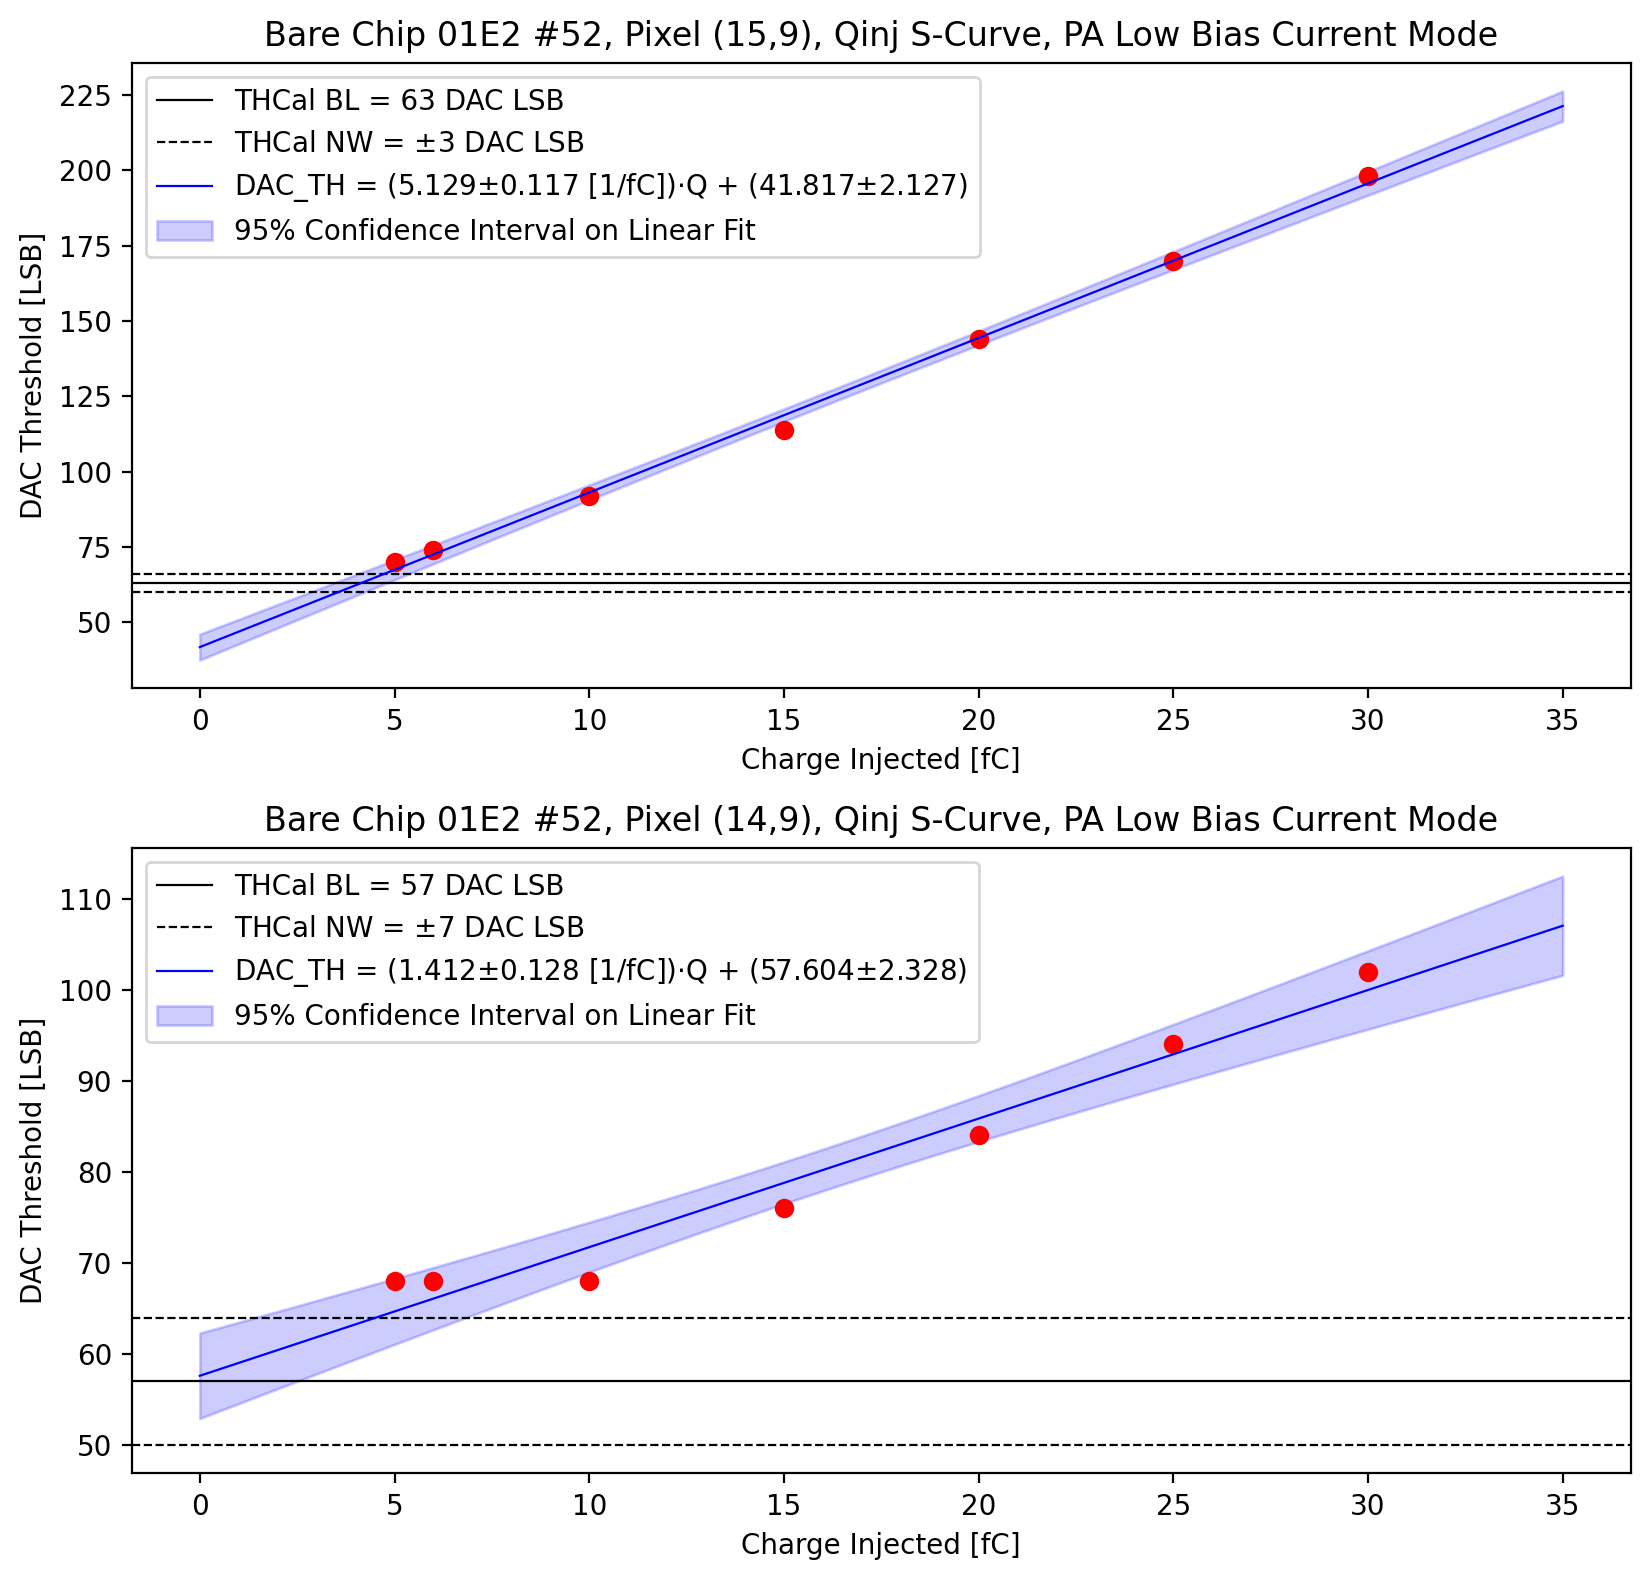

In [41]:
# https://nbviewer.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb
# https://tomholderness.wordpress.com/2013/01/10/confidence_intervals/
# https://stackoverflow.com/questions/27164114/show-confidence-limits-and-prediction-limits-in-scatter-plot

fig = plt.figure(dpi=200, figsize=(16,8))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        ax0.axhline(BL_map_THCal[(row,col)][5][50], color='k', lw=0.8, label=f"THCal BL = {int(BL_map_THCal[(row,col)][5][50])} DAC LSB")
        ax0.axhline(BL_map_THCal[(row,col)][5][50]+NW_map_THCal[(row,col)][5][50], color='k',ls="--", lw=0.8, label=f"THCal NW = $\pm${int(NW_map_THCal[(row,col)][5][50])} DAC LSB")
        ax0.axhline(BL_map_THCal[(row,col)][5][50]-NW_map_THCal[(row,col)][5][50], color='k',ls="--", lw=0.8)
        X = []
        Y = []
        for QInj in QInjEns:
            tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
            ax0.plot(QInj, thresholds[QInj][tp_idx], 'ro')
            X.append(QInj)
            Y.append(thresholds[QInj][tp_idx])
        X = np.array(X)
        Y = np.array(Y)
        (m, b), cov = np.polyfit(X, Y, 1, cov = True)
        n = Y.size
        Yfit = np.polyval((m,b), X)
        errorbars = np.sqrt(np.diag(cov))
        x_range = np.linspace(0, 35, 100)
        y_est = b + m*x_range
        resid = Y - Yfit
        s_err = np.sqrt(np.sum(resid**2)/(n - 2))
        t = stats.t.ppf(0.95, n - 2)
        ci = t * s_err * np.sqrt(    1/n + (X - np.mean(X))**2/np.sum((X-np.mean(X))**2)) # confidence interval
        pi = t * s_err * np.sqrt(1 + 1/n + (X - np.mean(X))**2/np.sum((X-np.mean(X))**2)) # prediction interval
        # cip= t * s_err * np.sqrt(    1/n + (X - np.mean(X))**2/(np.sum((X)**2)-n*np.sum((np.mean(X))**2)))
        ci2= t * s_err * np.sqrt(    1/n + (x_range - np.mean(X))**2/(np.sum((X)**2)-n*np.sum((np.mean(X))**2)))
        
        ax0.plot(x_range, y_est, 'b-', lw=-.8, label=f"DAC_TH = ({m:.3f}$\pm${errorbars[0]:.3f} [1/fC])$\cdot$Q + ({b:.3f}$\pm${errorbars[1]:.3f})")
        plt.fill_between(x_range, y_est+ci2, y_est-ci2, color='b',alpha=0.2, label="95% Confidence Interval on Linear Fit")
        ax0.set_xlabel("Charge Injected [fC]")
        ax0.set_ylabel("DAC Threshold [LSB]")
        plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("figures/multipixel_q_vs_dac_scurve.pdf")
plt.savefig("figures/multipixel_q_vs_dac_scurve.png")
plt.show()

## TOA TOT CAL plots vs DAC

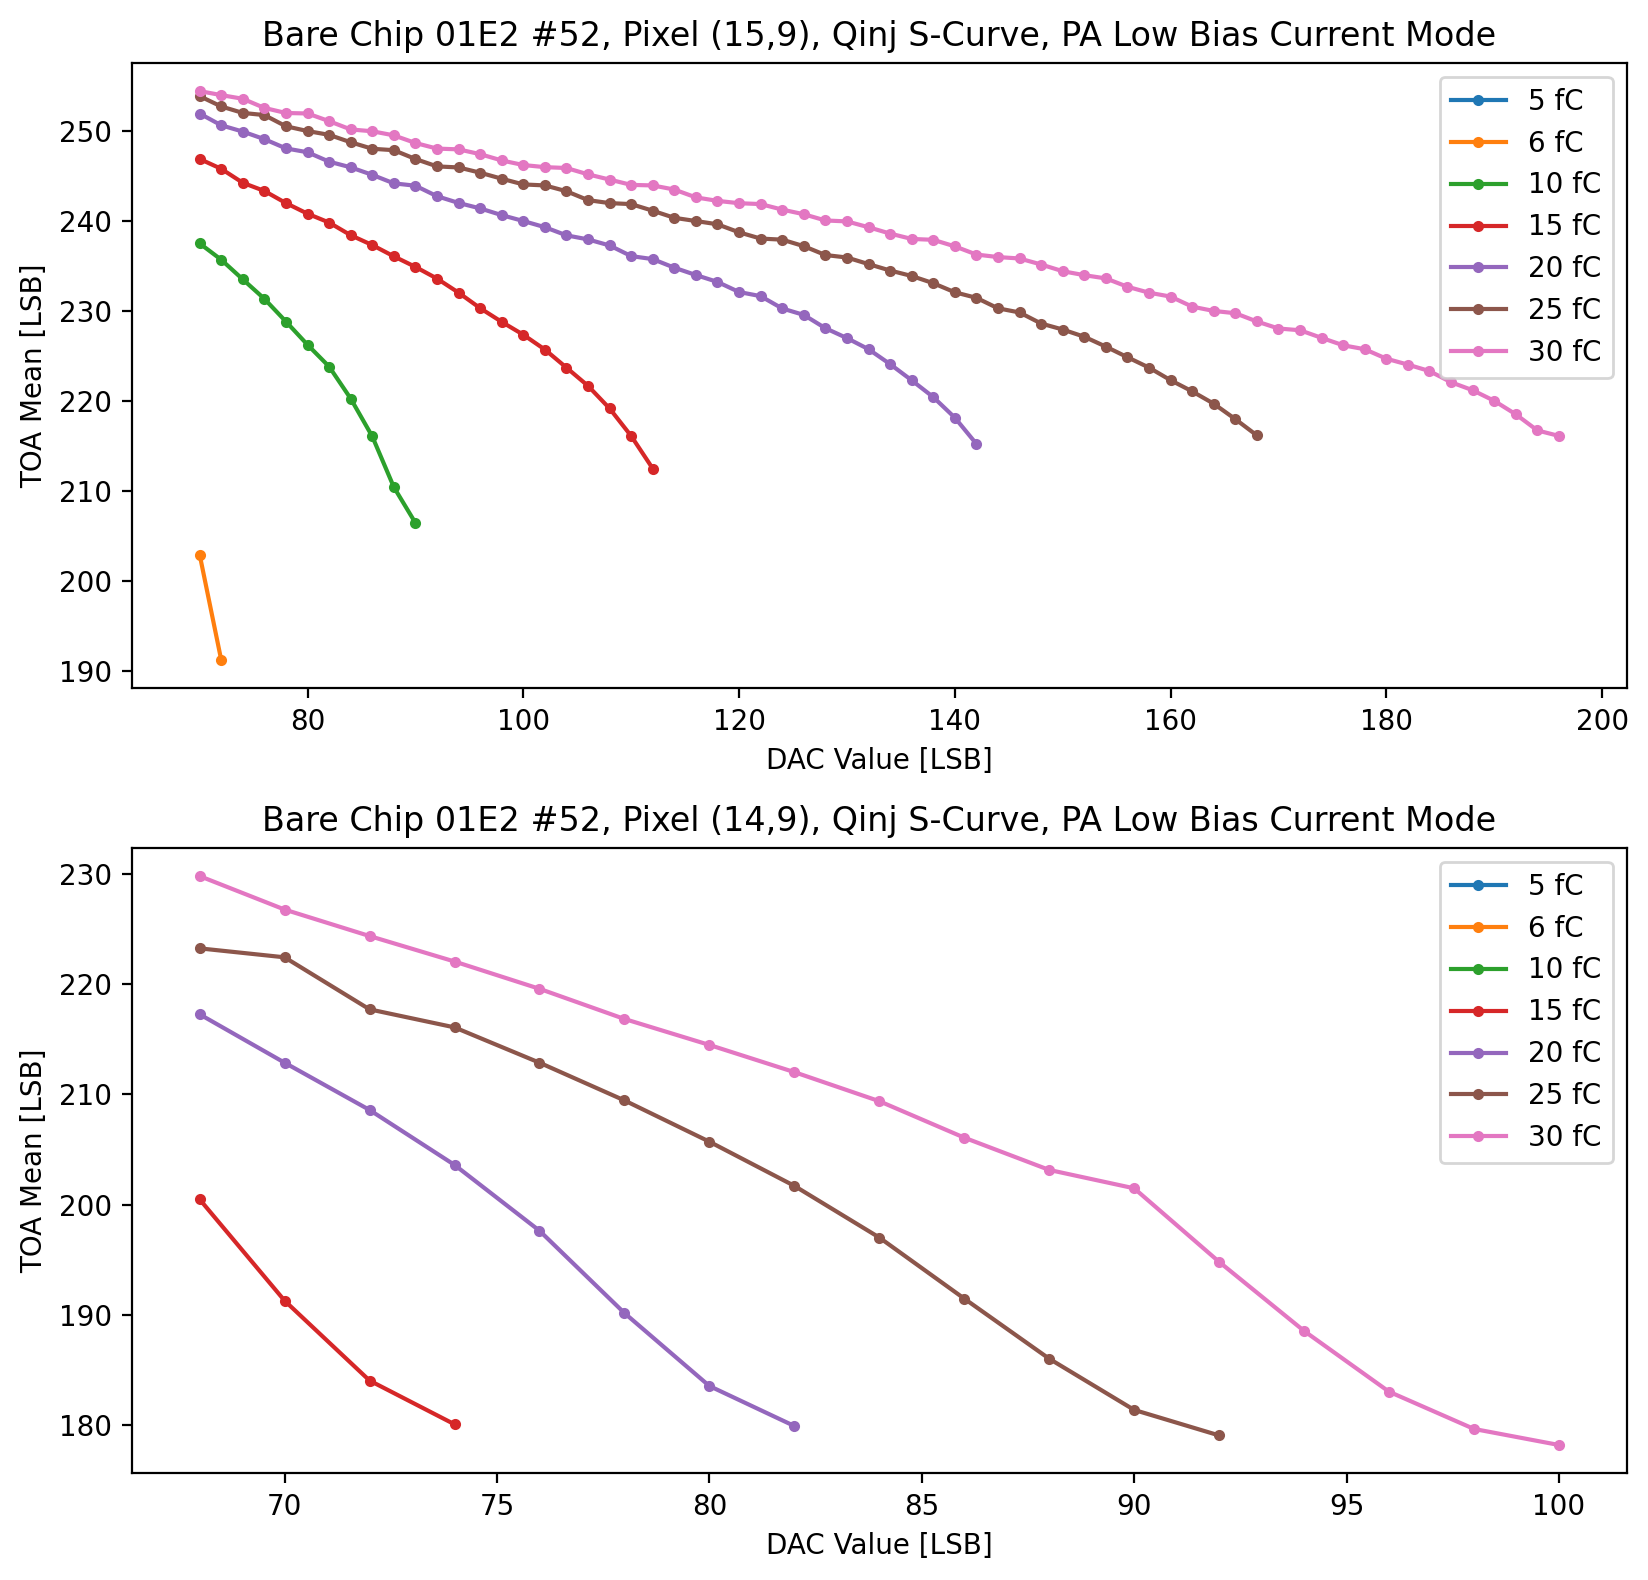

In [50]:
fig = plt.figure(dpi=200, figsize=(16,8))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        for QInj in QInjEns:
            tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
            sp_idx = starting_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj], BL_map_THCal[(row,col)][5][50], NW_map_THCal[(row,col)][5][50])
            ax0.plot(thresholds[QInj][sp_idx+1:tp_idx-0], np.array(list(TOA_mean[(row,col)][QInj].values()))[sp_idx+1:tp_idx-0], '.-', label=f"{QInj} fC")
        ax0.set_xlabel("DAC Value [LSB]")
        ax0.set_ylabel("TOA Mean [LSB]")
        plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figures/multipixel_toa_mean_scurve.pdf")
plt.show()

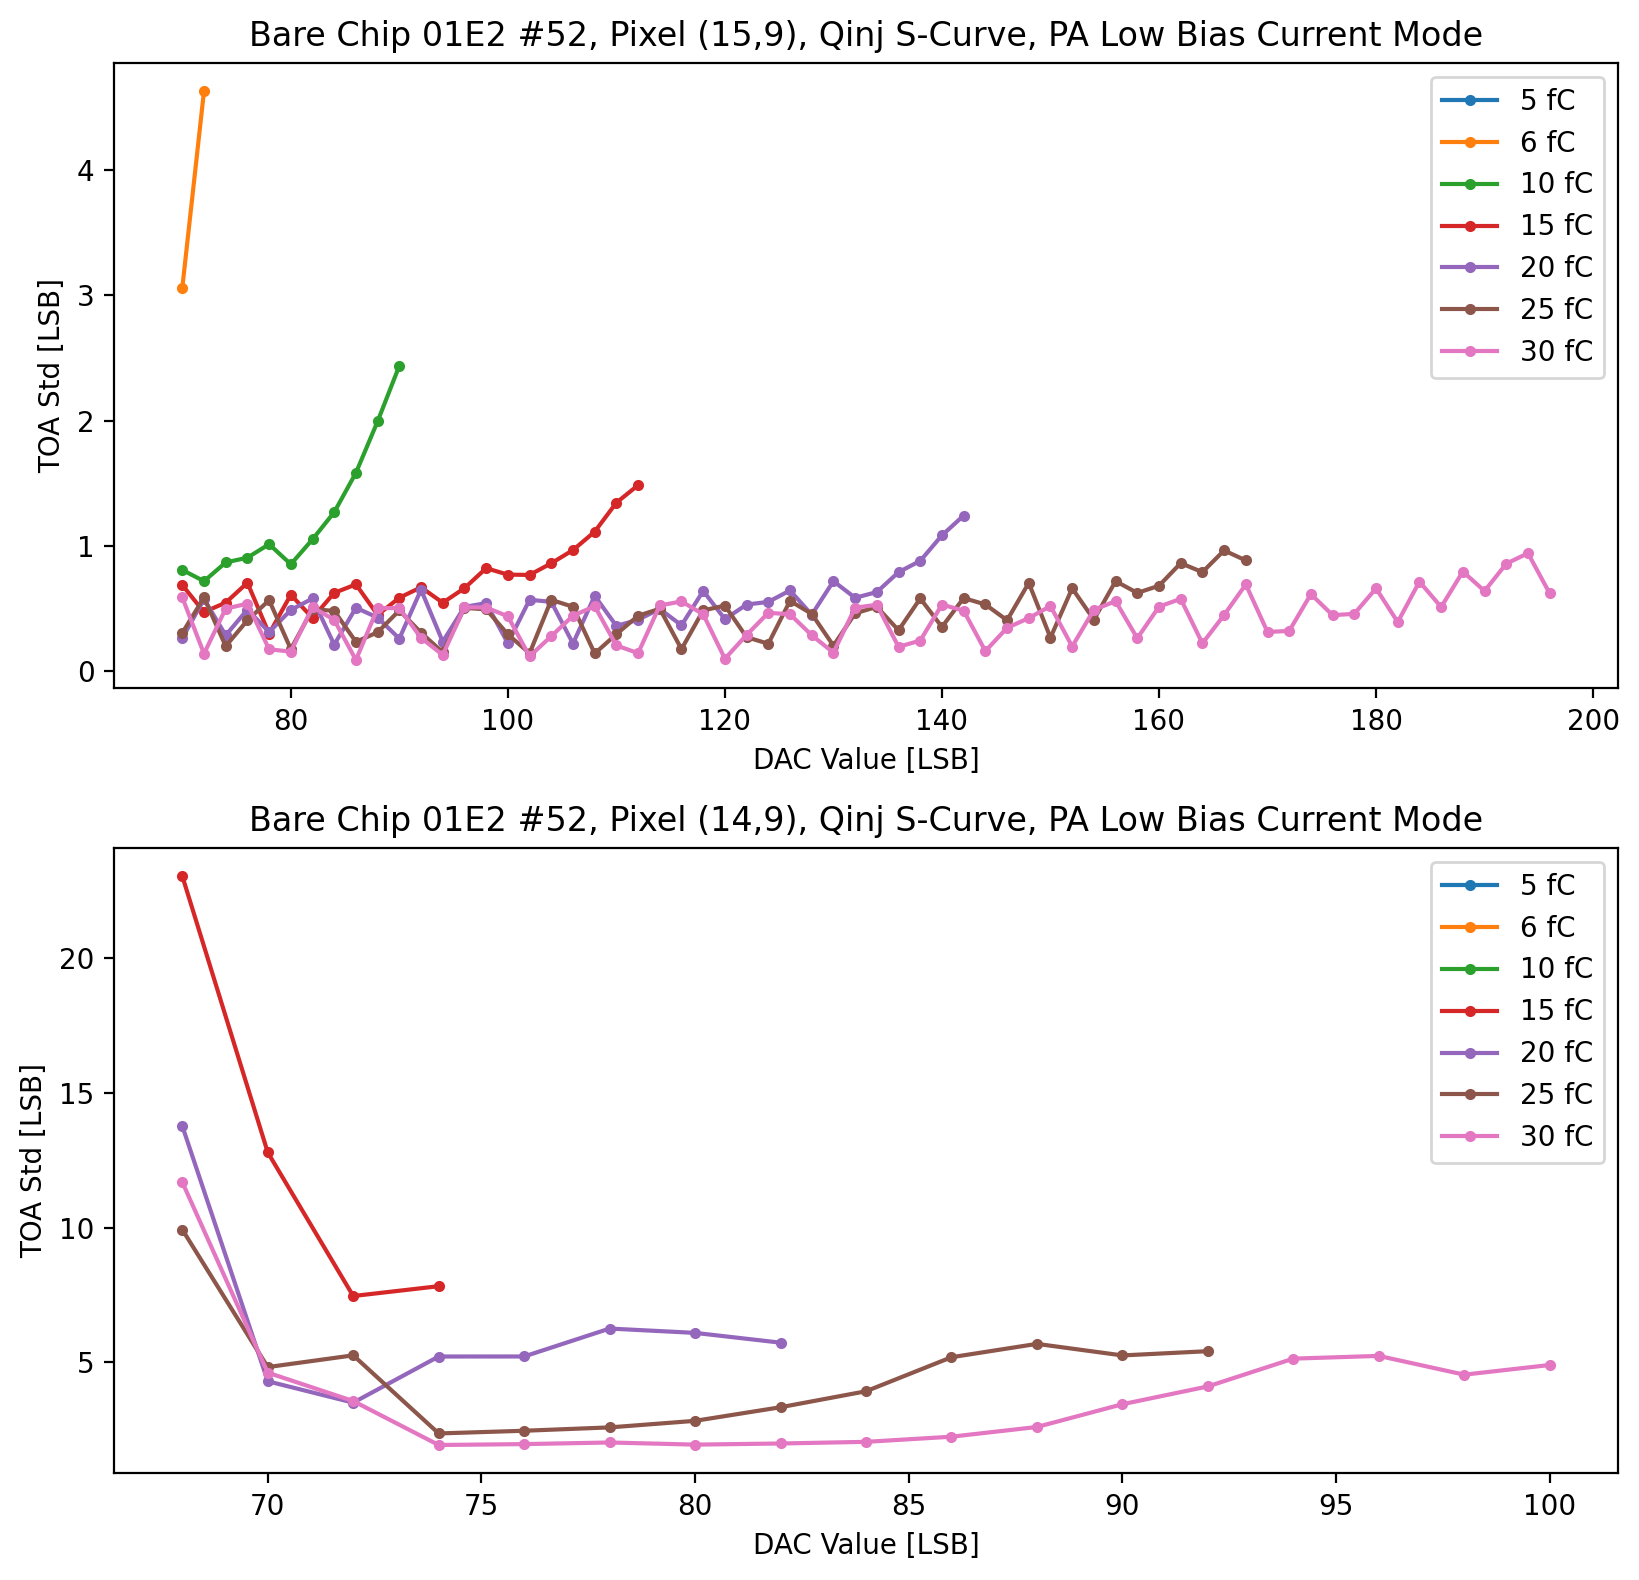

In [53]:
fig = plt.figure(dpi=200, figsize=(16,8))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        X = []
        Y = []
        for QInj in QInjEns:
            tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
            sp_idx = starting_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj], BL_map_THCal[(row,col)][5][50], NW_map_THCal[(row,col)][5][50])
            ax0.plot(thresholds[QInj][sp_idx+1:tp_idx-0], np.array(list(TOA_std[(row,col)][QInj].values()))[sp_idx+1:tp_idx-0], '.-', label=f"{QInj} fC")
            X.append(QInj)
            Y.append(thresholds[QInj][tp_idx])
        X = np.array(X)
        Y = np.array(Y)
        ax0.set_xlabel("DAC Value [LSB]")
        ax0.set_ylabel("TOA Std [LSB]")
        plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figures/multipixel_toa_std_scurve.pdf")
plt.show()

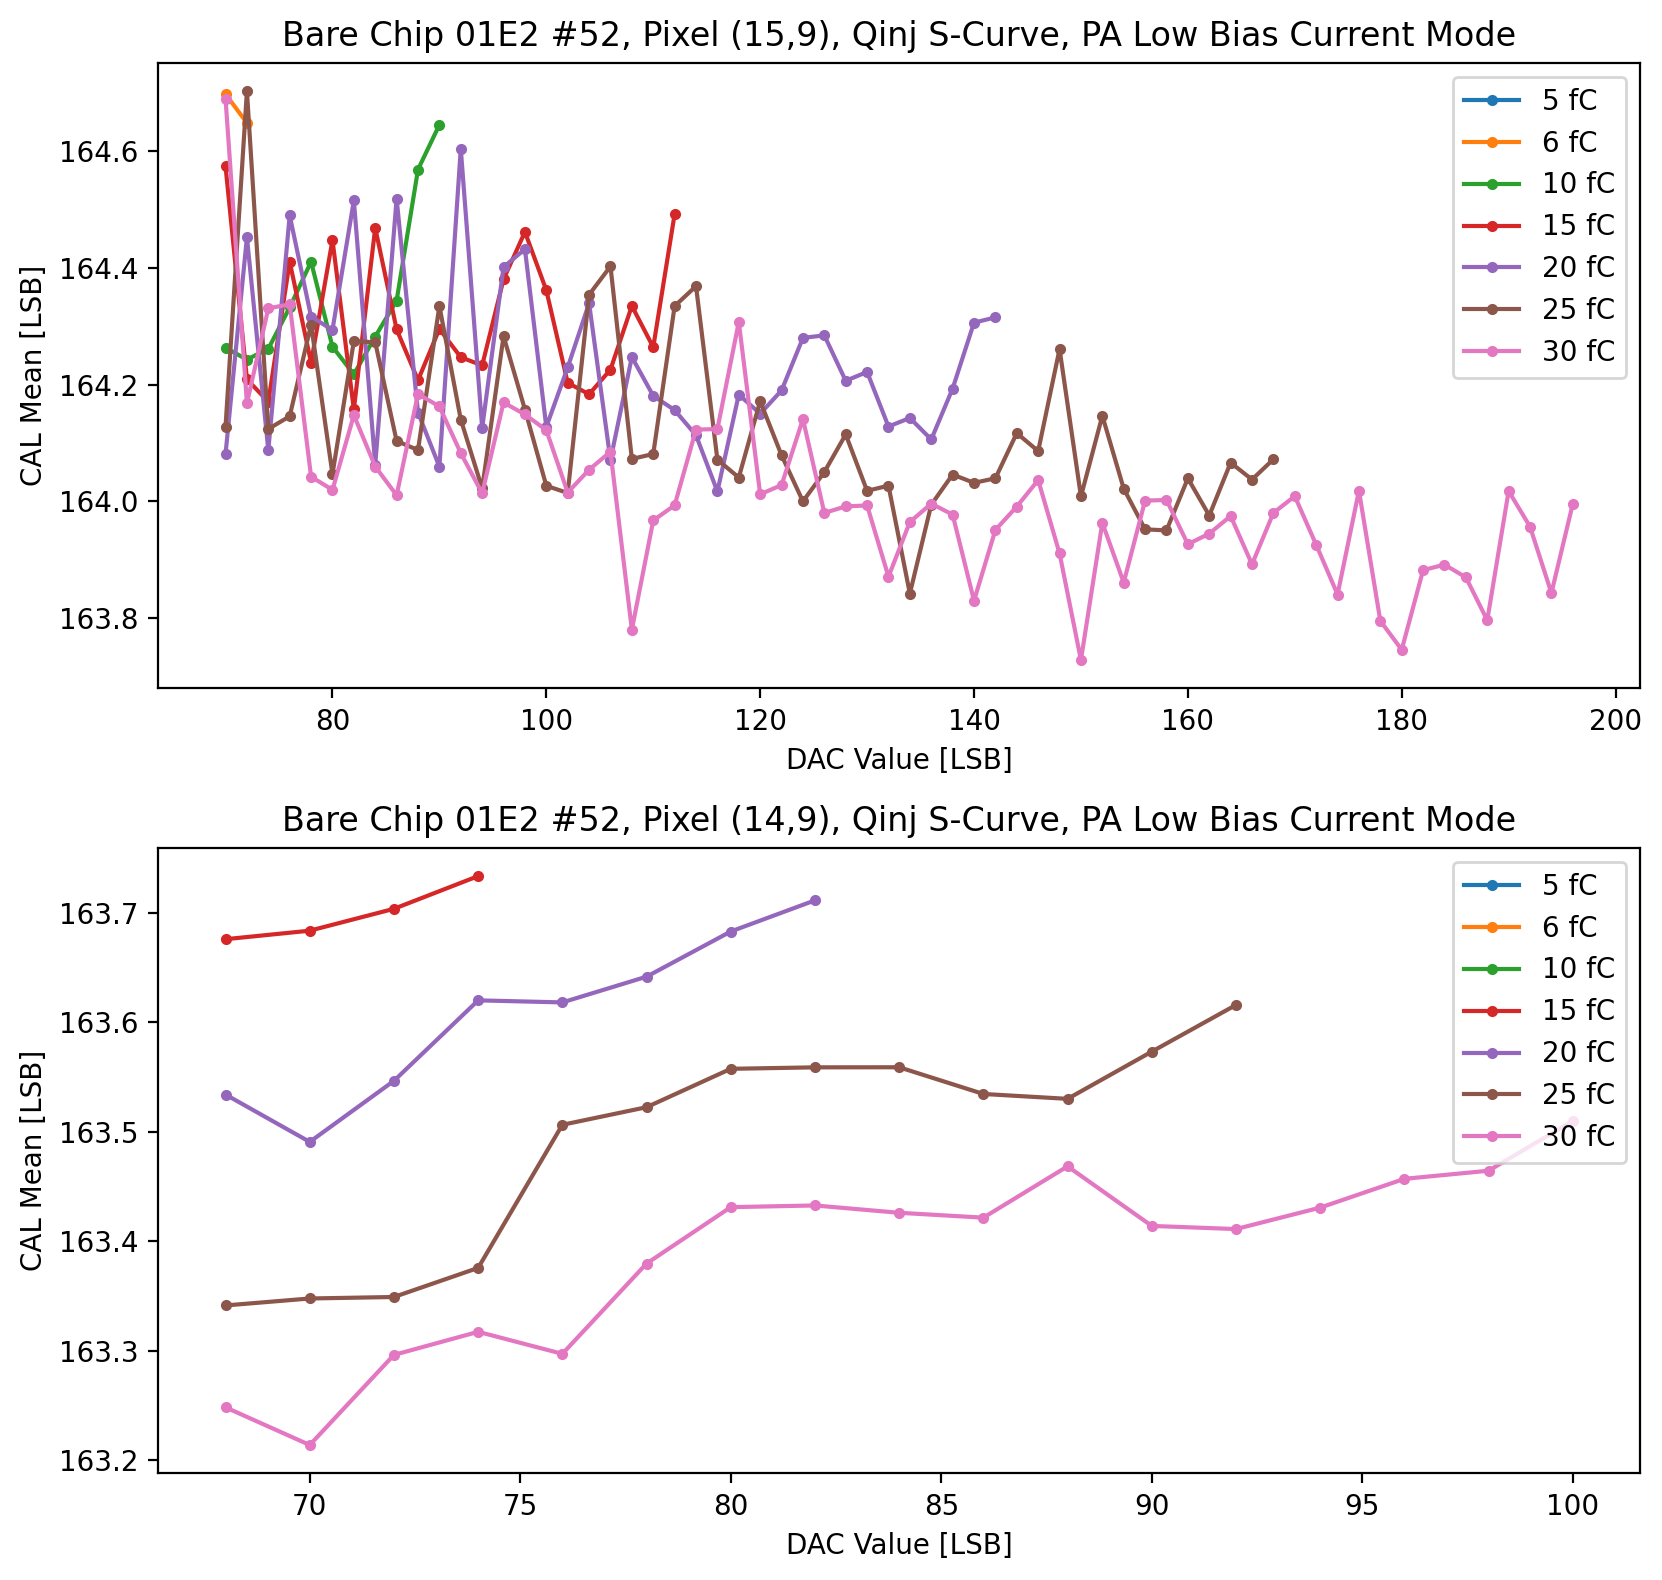

In [55]:
fig = plt.figure(dpi=200, figsize=(16,8))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        X = []
        Y = []
        for QInj in QInjEns:
            tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
            sp_idx = starting_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj], BL_map_THCal[(row,col)][5][50], NW_map_THCal[(row,col)][5][50])
            ax0.plot(thresholds[QInj][sp_idx+1:tp_idx-0], np.array(list(CAL_mean[(row,col)][QInj].values()))[sp_idx+1:tp_idx-0], '.-', label=f"{QInj} fC")
            X.append(QInj)
            Y.append(thresholds[QInj][tp_idx])
        X = np.array(X)
        Y = np.array(Y)
        ax0.set_xlabel("DAC Value [LSB]")
        ax0.set_ylabel("CAL Mean [LSB]")
        plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figures/multipixel_cal_mean_scurve.pdf")
plt.show()

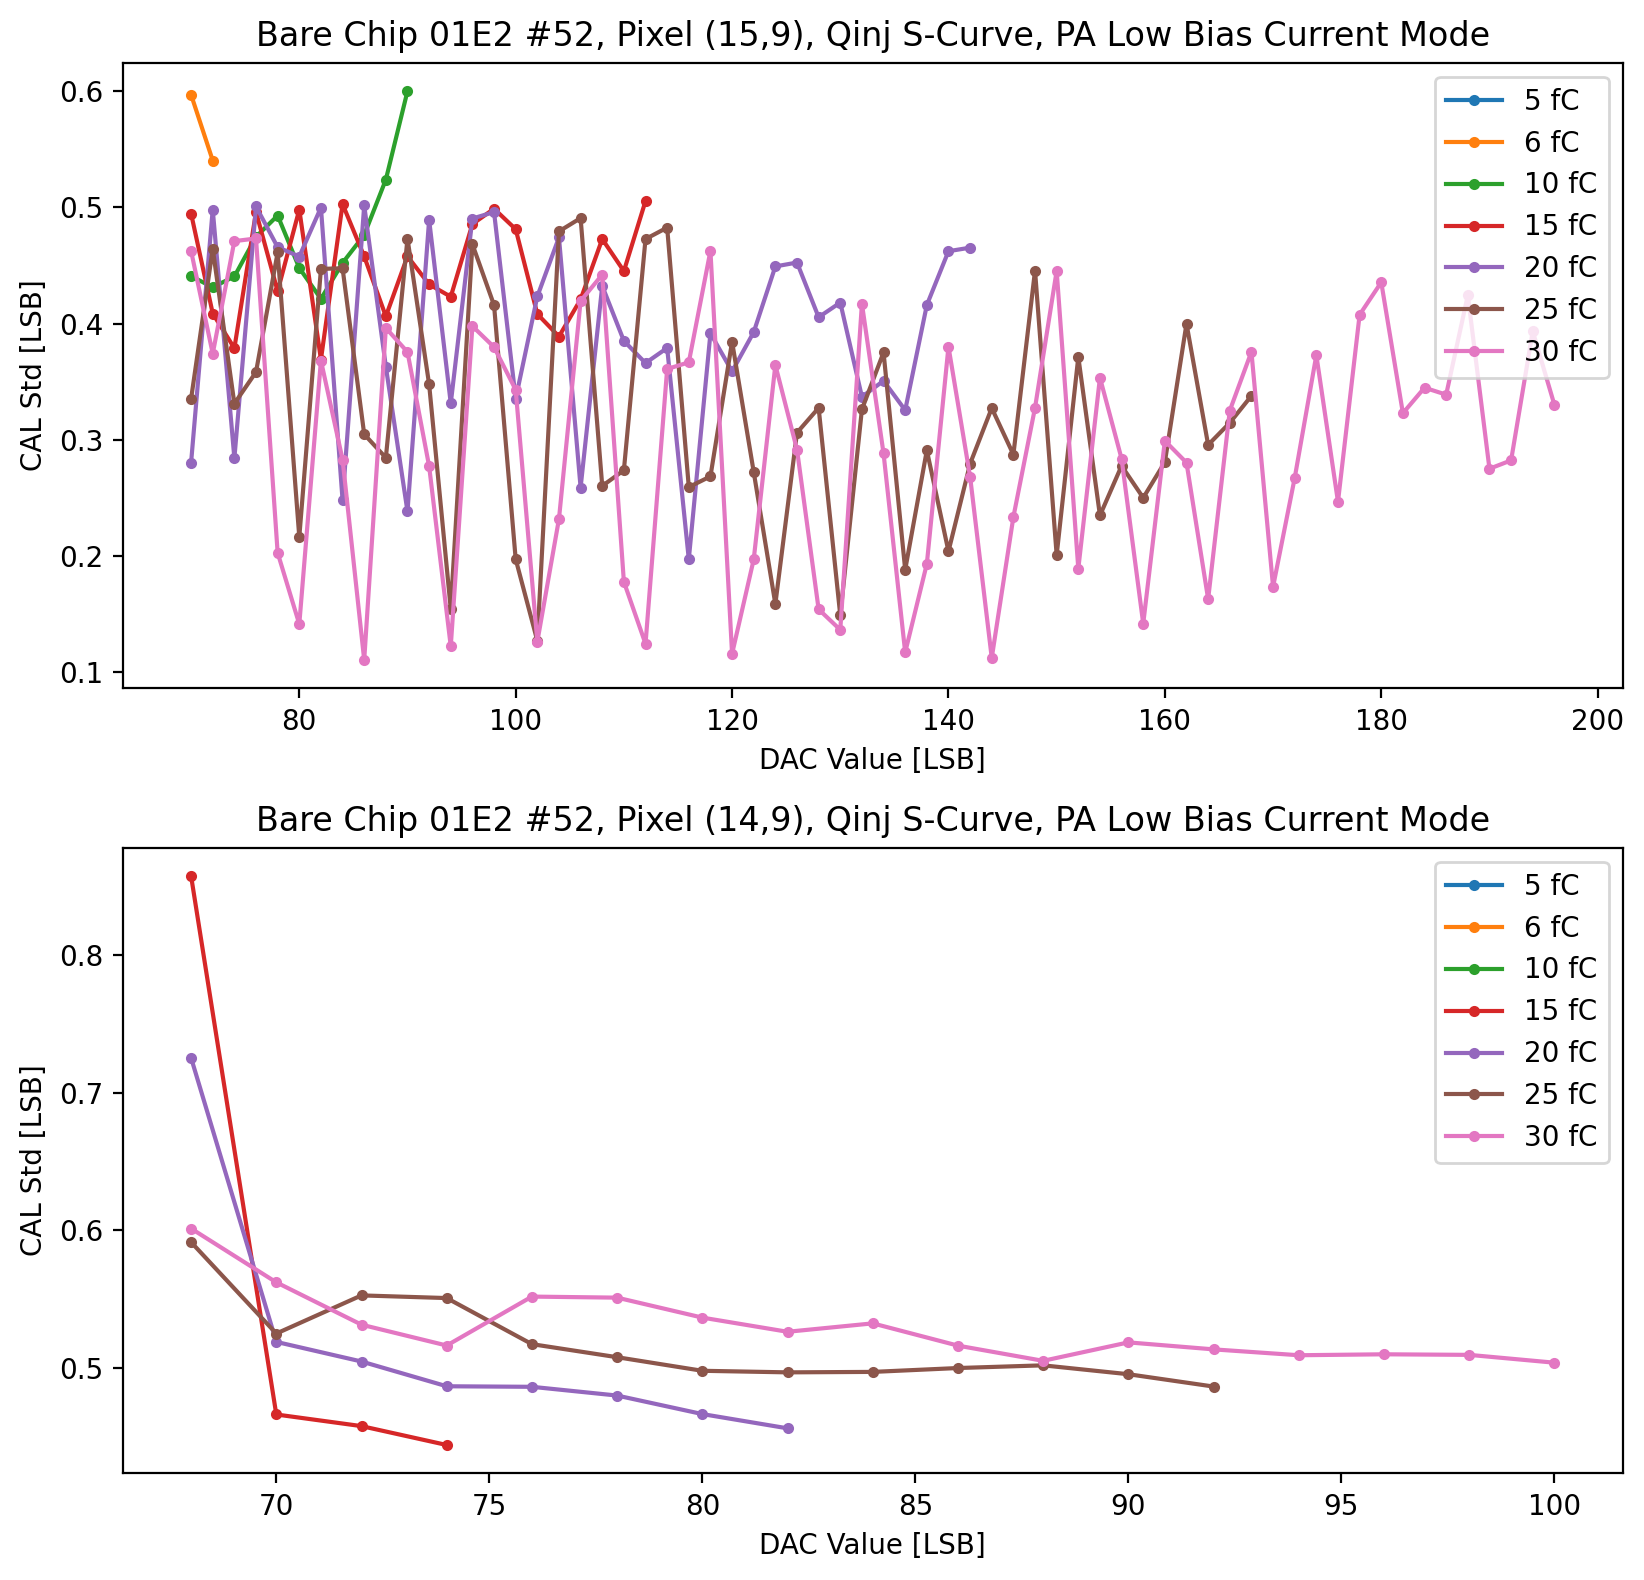

In [57]:
fig = plt.figure(dpi=200, figsize=(16,8))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        X = []
        Y = []
        for QInj in QInjEns:
            tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
            sp_idx = starting_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj], BL_map_THCal[(row,col)][5][50], NW_map_THCal[(row,col)][5][50])
            ax0.plot(thresholds[QInj][sp_idx+1:tp_idx-0], np.array(list(CAL_std[(row,col)][QInj].values()))[sp_idx+1:tp_idx-0], '.-', label=f"{QInj} fC")
            X.append(QInj)
            Y.append(thresholds[QInj][tp_idx])
        X = np.array(X)
        Y = np.array(Y)
        ax0.set_xlabel("DAC Value [LSB]")
        ax0.set_ylabel("CAL Std [LSB]")
        plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figures/multipixel_cal_std_scurve.pdf")
plt.show()

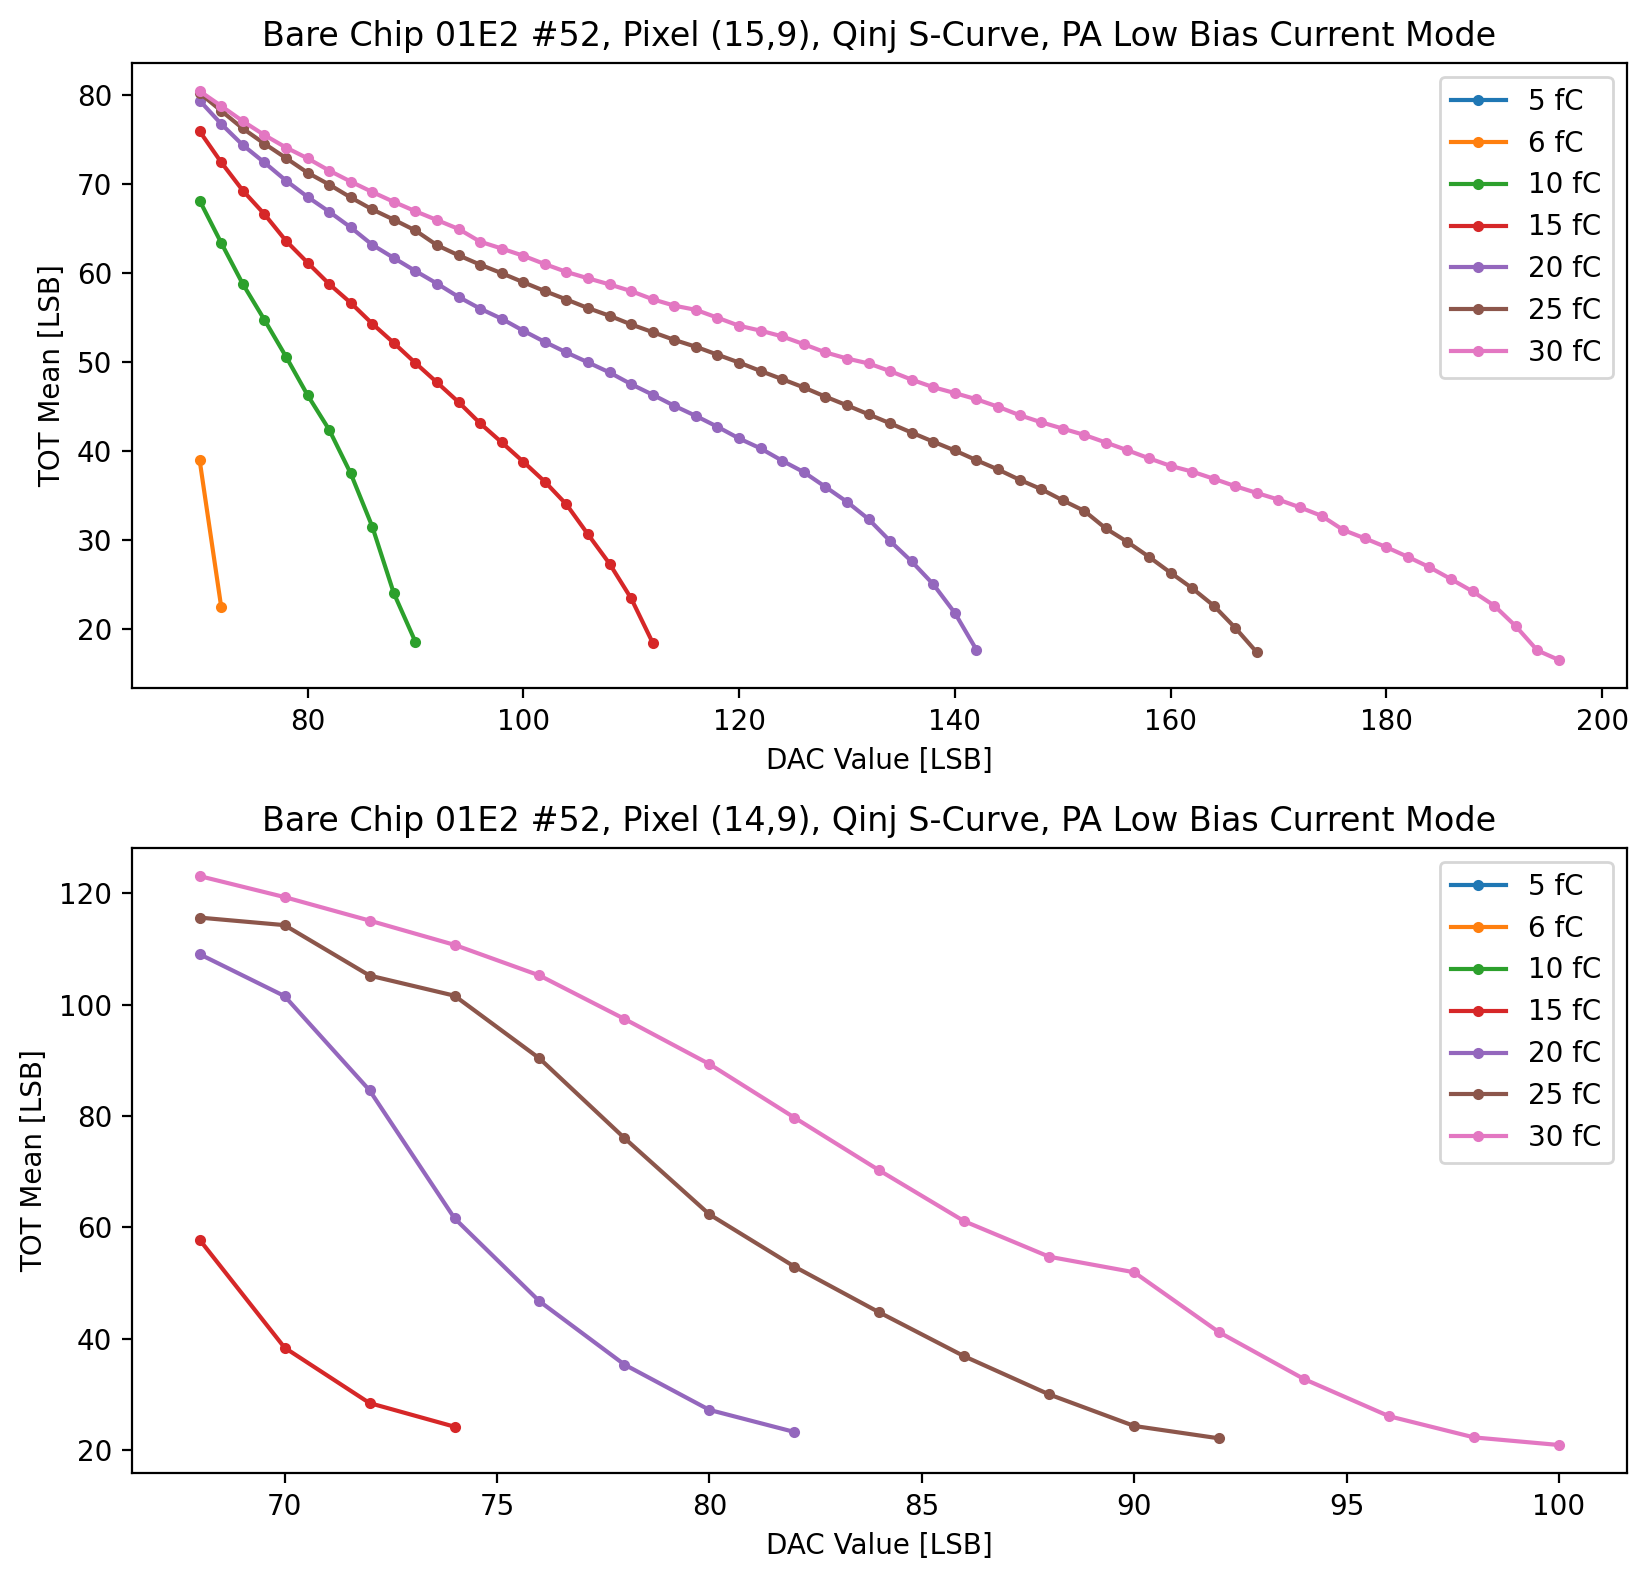

In [59]:
fig = plt.figure(dpi=200, figsize=(16,8))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        X = []
        Y = []
        for QInj in QInjEns:
            tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
            sp_idx = starting_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj], BL_map_THCal[(row,col)][5][50], NW_map_THCal[(row,col)][5][50])
            ax0.plot(thresholds[QInj][sp_idx+1:tp_idx-0], np.array(list(TOT_mean[(row,col)][QInj].values()))[sp_idx+1:tp_idx-0], '.-', label=f"{QInj} fC")
            X.append(QInj)
            Y.append(thresholds[QInj][tp_idx])
        X = np.array(X)
        Y = np.array(Y)
        ax0.set_xlabel("DAC Value [LSB]")
        ax0.set_ylabel("TOT Mean [LSB]")
        plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figures/multipixel_tot_mean_scurve.pdf")
plt.show()

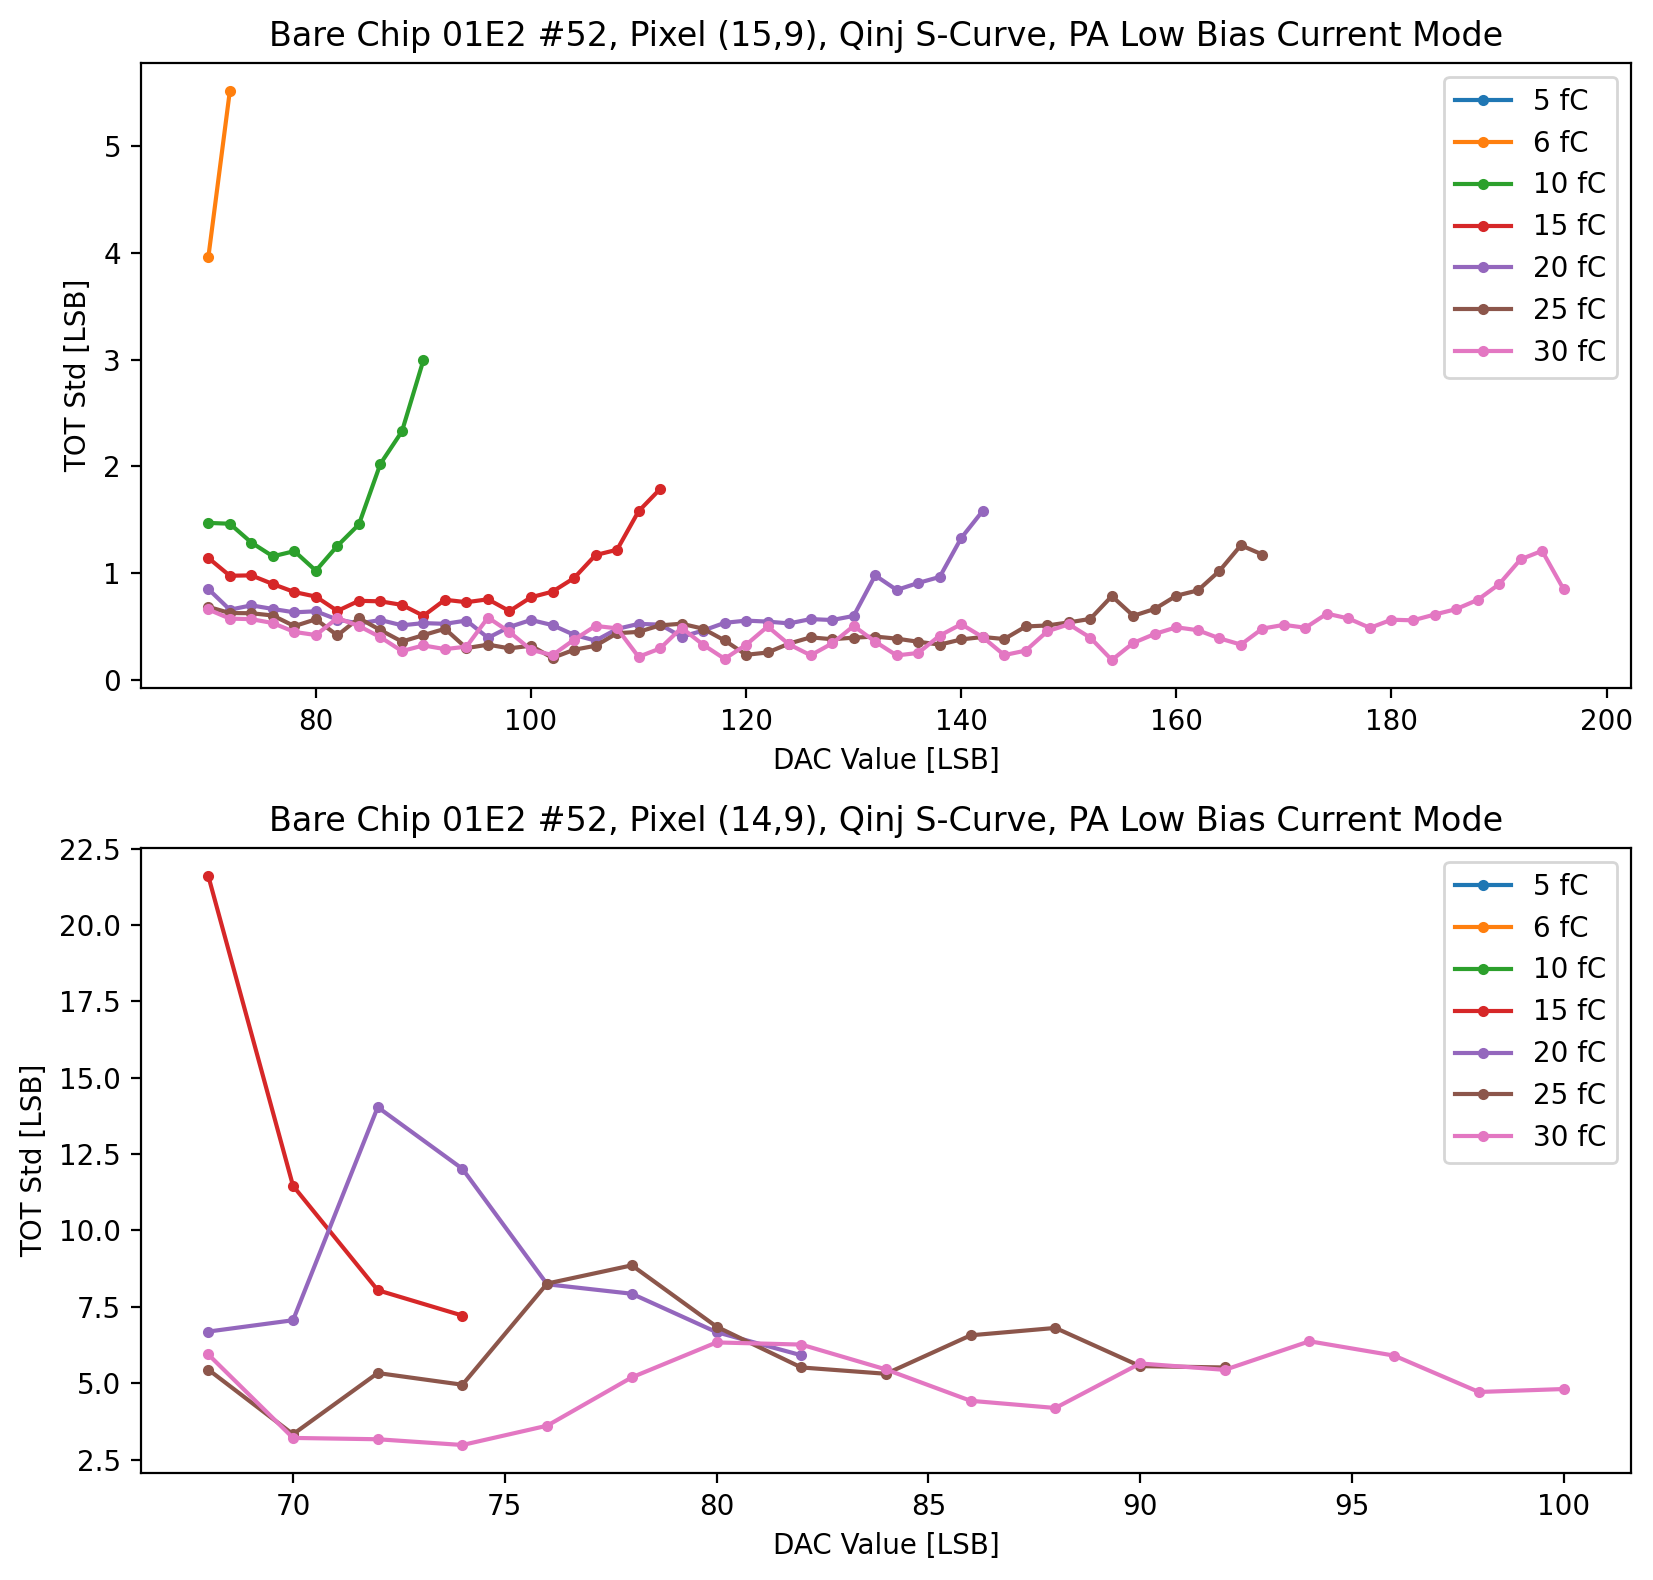

In [61]:
fig = plt.figure(dpi=200, figsize=(16,8))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        X = []
        Y = []
        for QInj in QInjEns:
            tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
            sp_idx = starting_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj], BL_map_THCal[(row,col)][5][50], NW_map_THCal[(row,col)][5][50])
            ax0.plot(thresholds[QInj][sp_idx+1:tp_idx-0], np.array(list(TOT_std[(row,col)][QInj].values()))[sp_idx+1:tp_idx-0], '.-', label=f"{QInj} fC")
            X.append(QInj)
            Y.append(thresholds[QInj][tp_idx])
        X = np.array(X)
        Y = np.array(Y)
        ax0.set_xlabel("DAC Value [LSB]")
        ax0.set_ylabel("TOT Std [LSB]")
        plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figures/multipixel_tot_std_scurve.pdf")
plt.show()

# TOA vs TOT

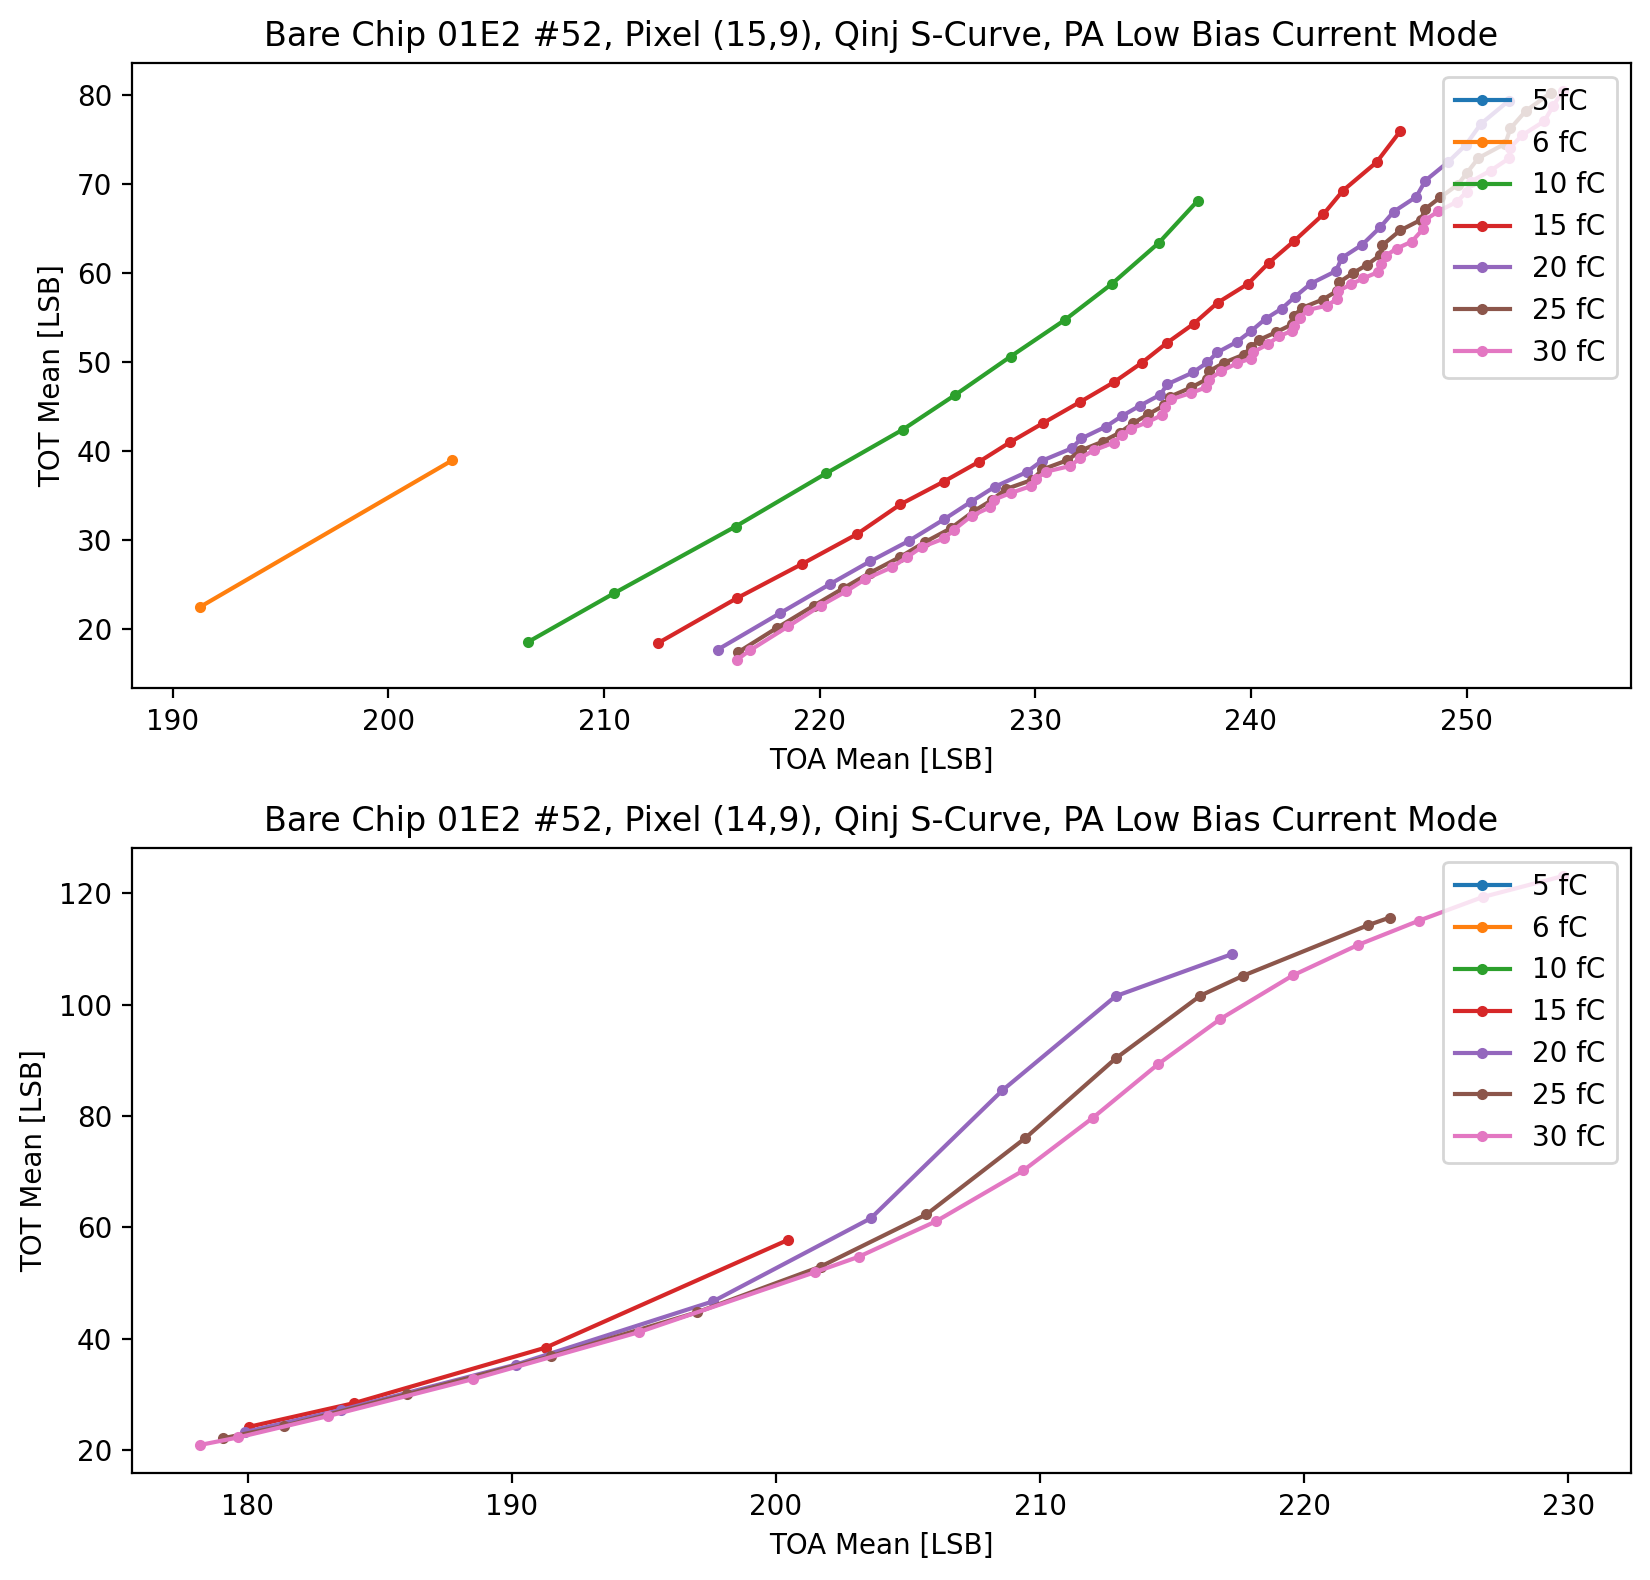

In [63]:
fig = plt.figure(dpi=200, figsize=(16,8))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        for QInj in QInjEns:
            tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
            sp_idx = starting_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj], BL_map_THCal[(row,col)][5][50], NW_map_THCal[(row,col)][5][50])
            ax0.plot(np.array(list(TOA_mean[(row,col)][QInj].values()))[sp_idx+1:tp_idx-0], np.array(list(TOT_mean[(row,col)][QInj].values()))[sp_idx+1:tp_idx-0], '.-', label=f"{QInj} fC")
        ax0.set_xlabel("TOA Mean [LSB]")
        ax0.set_ylabel("TOT Mean [LSB]")
        plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figures/multipixel_toa_mean_vs_tot_mean_scurve.pdf")
plt.show()

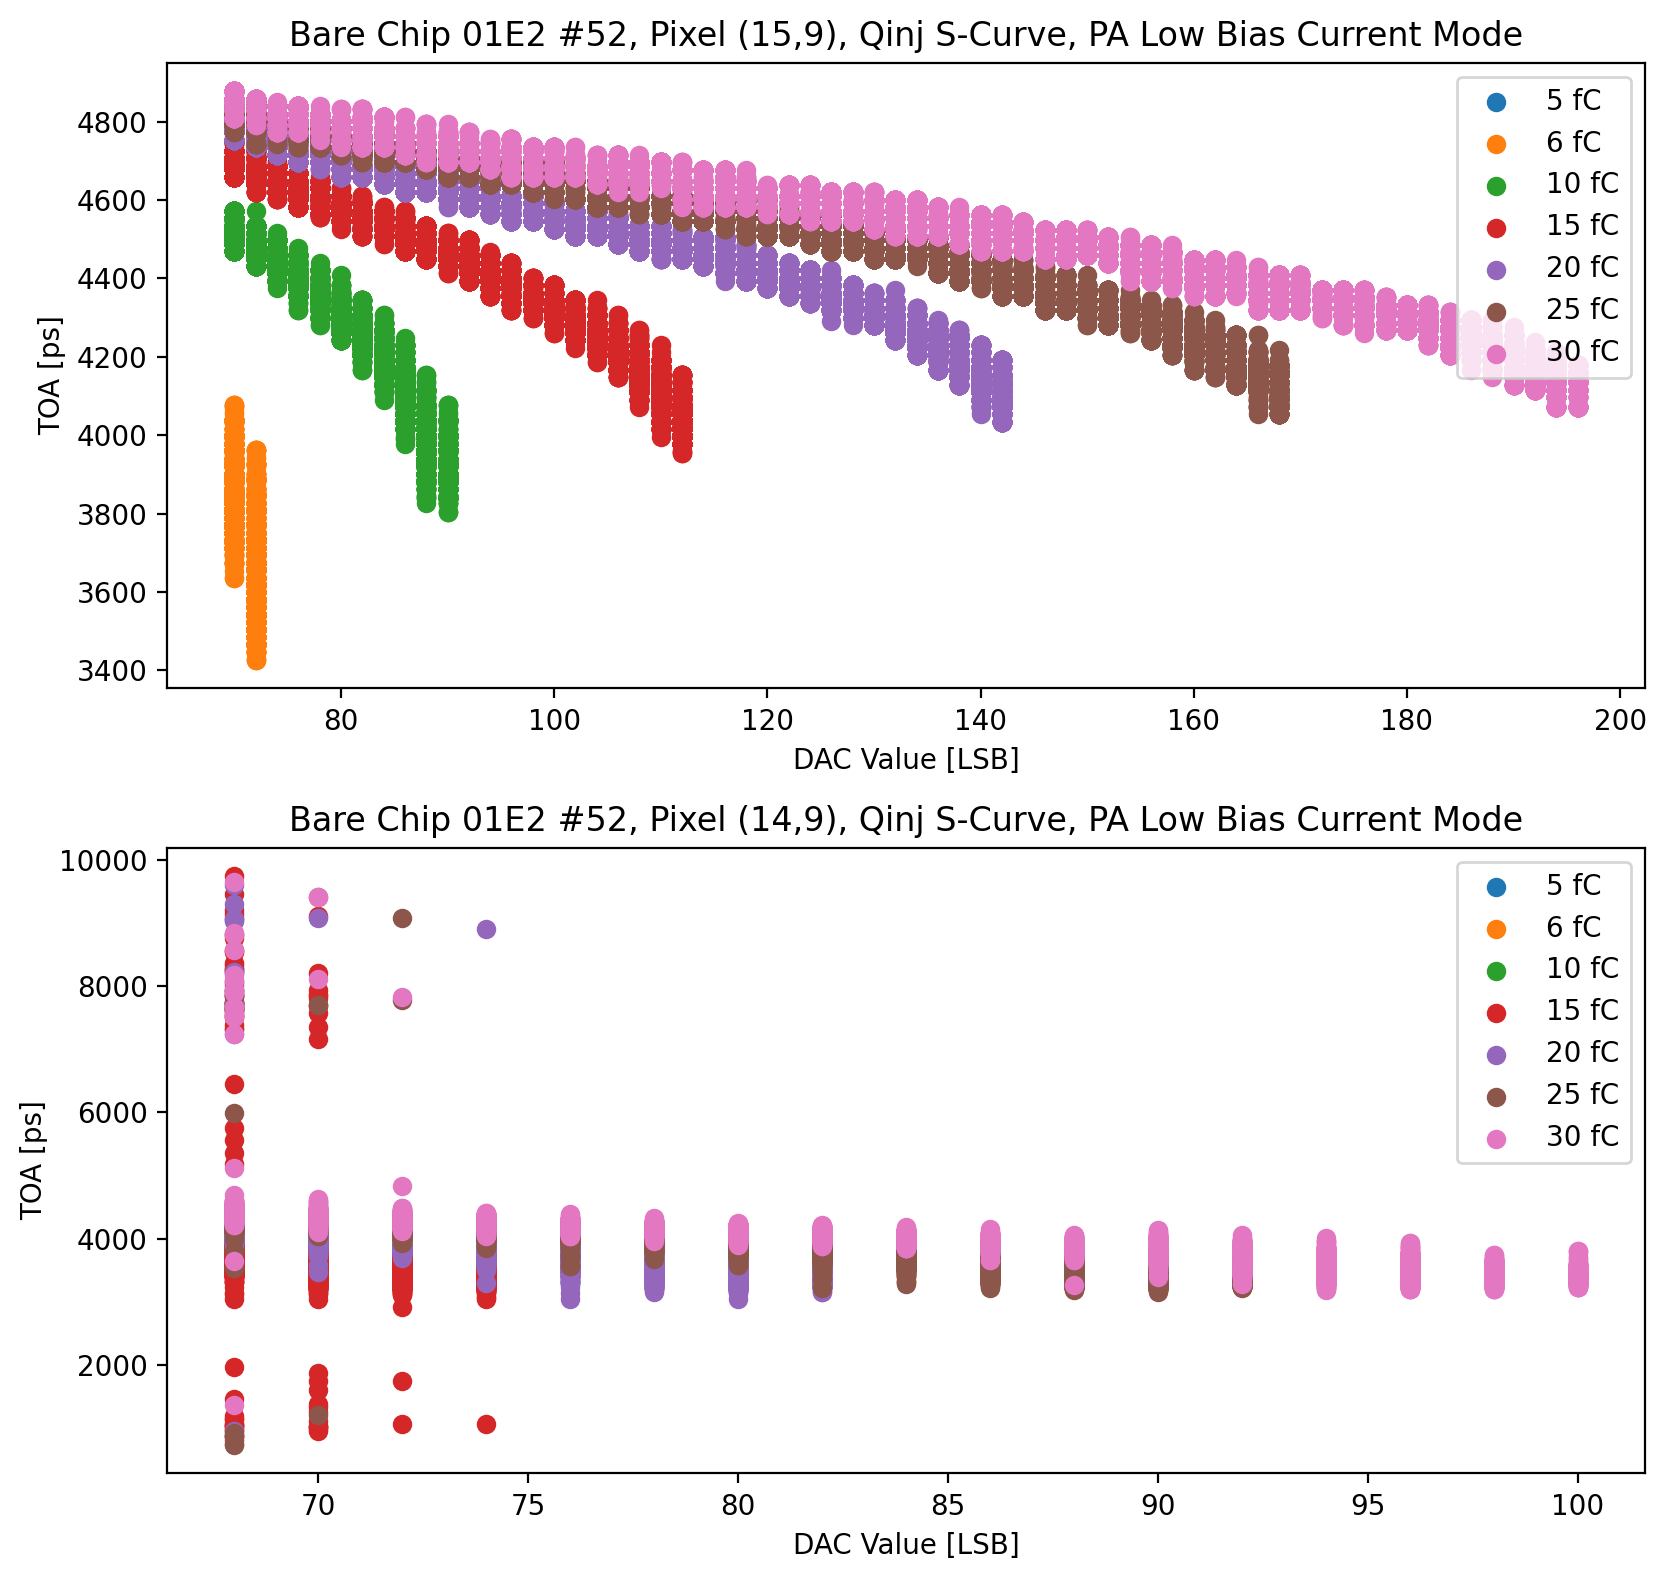

In [72]:
fig = plt.figure(dpi=200, figsize=(16,8))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        for QInj in QInjEns:
            tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
            sp_idx = starting_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj], BL_map_THCal[(row,col)][5][50], NW_map_THCal[(row,col)][5][50])
            selection = (del_[(row,col)]<thresholds[QInj][tp_idx]) & (del_[(row,col)]>=thresholds[QInj][sp_idx+1]) & (qin_[(row,col)]==QInj)
            ax0.scatter(((del_[(row,col)][selection][::4])), ((((3125/cal_[(row,col)])*toa_[(row,col)])[selection][::4])), label=f"{QInj} fC")
        ax0.set_xlabel("DAC Value [LSB]")
        ax0.set_ylabel("TOA [ps]")
        plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figures/multipixel_toa_raw_ps_scurve.pdf")
plt.show()


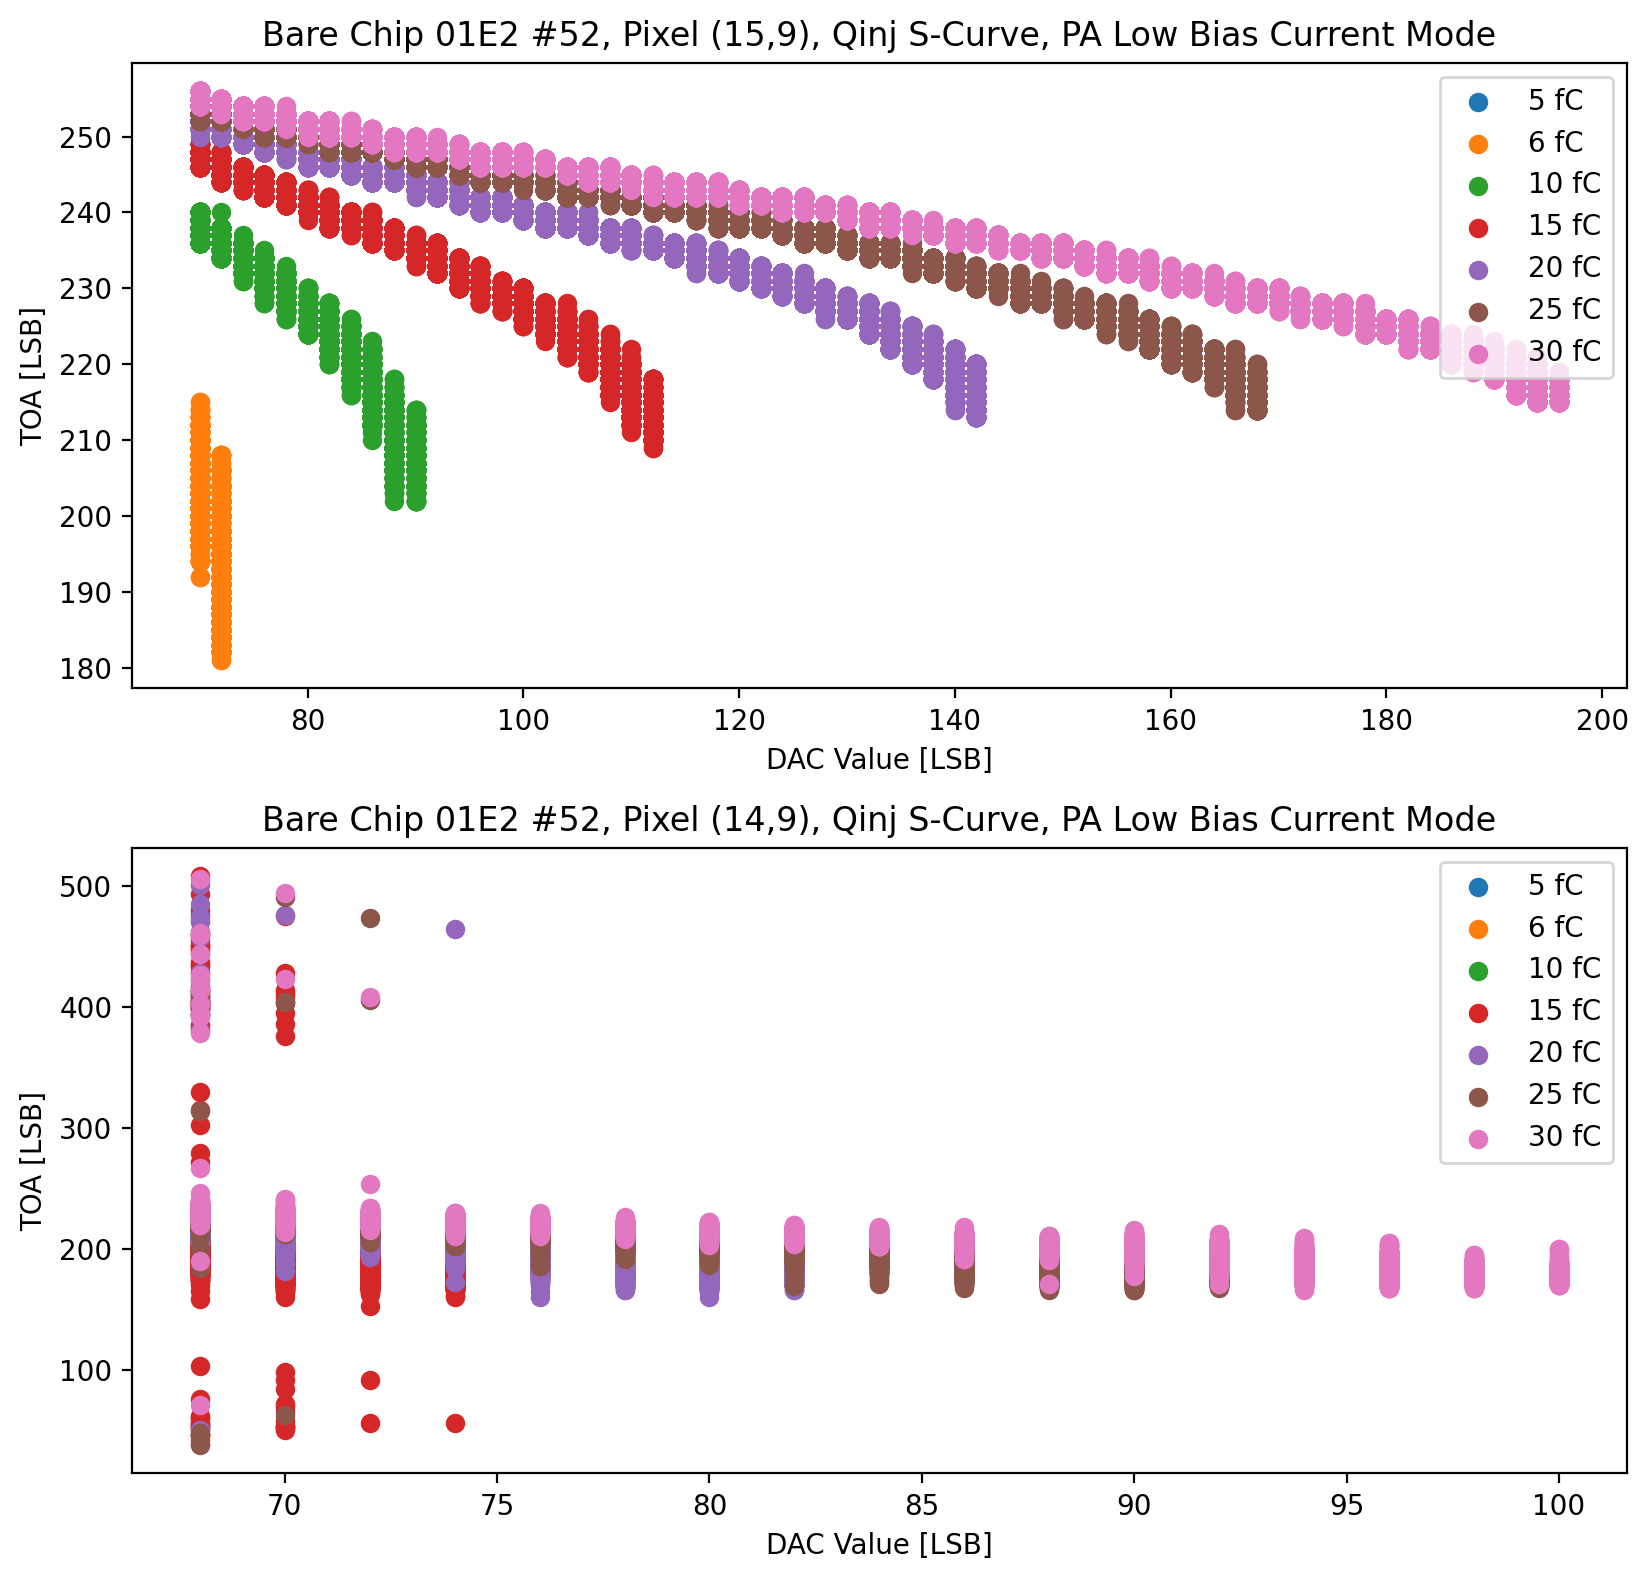

In [74]:
fig = plt.figure(dpi=200, figsize=(16,8))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        for QInj in QInjEns:
            tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
            sp_idx = starting_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj], BL_map_THCal[(row,col)][5][50], NW_map_THCal[(row,col)][5][50])
            selection = (del_[(row,col)]<thresholds[QInj][tp_idx]) & (del_[(row,col)]>=thresholds[QInj][sp_idx+1]) & (qin_[(row,col)]==QInj)
            ax0.scatter(((del_[(row,col)][selection][::4])), (((toa_[(row,col)])[selection][::4])), label=f"{QInj} fC")
        ax0.set_xlabel("DAC Value [LSB]")
        ax0.set_ylabel("TOA [LSB]")
        plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figures/multipixel_toa_raw_scurve.pdf")
plt.show()


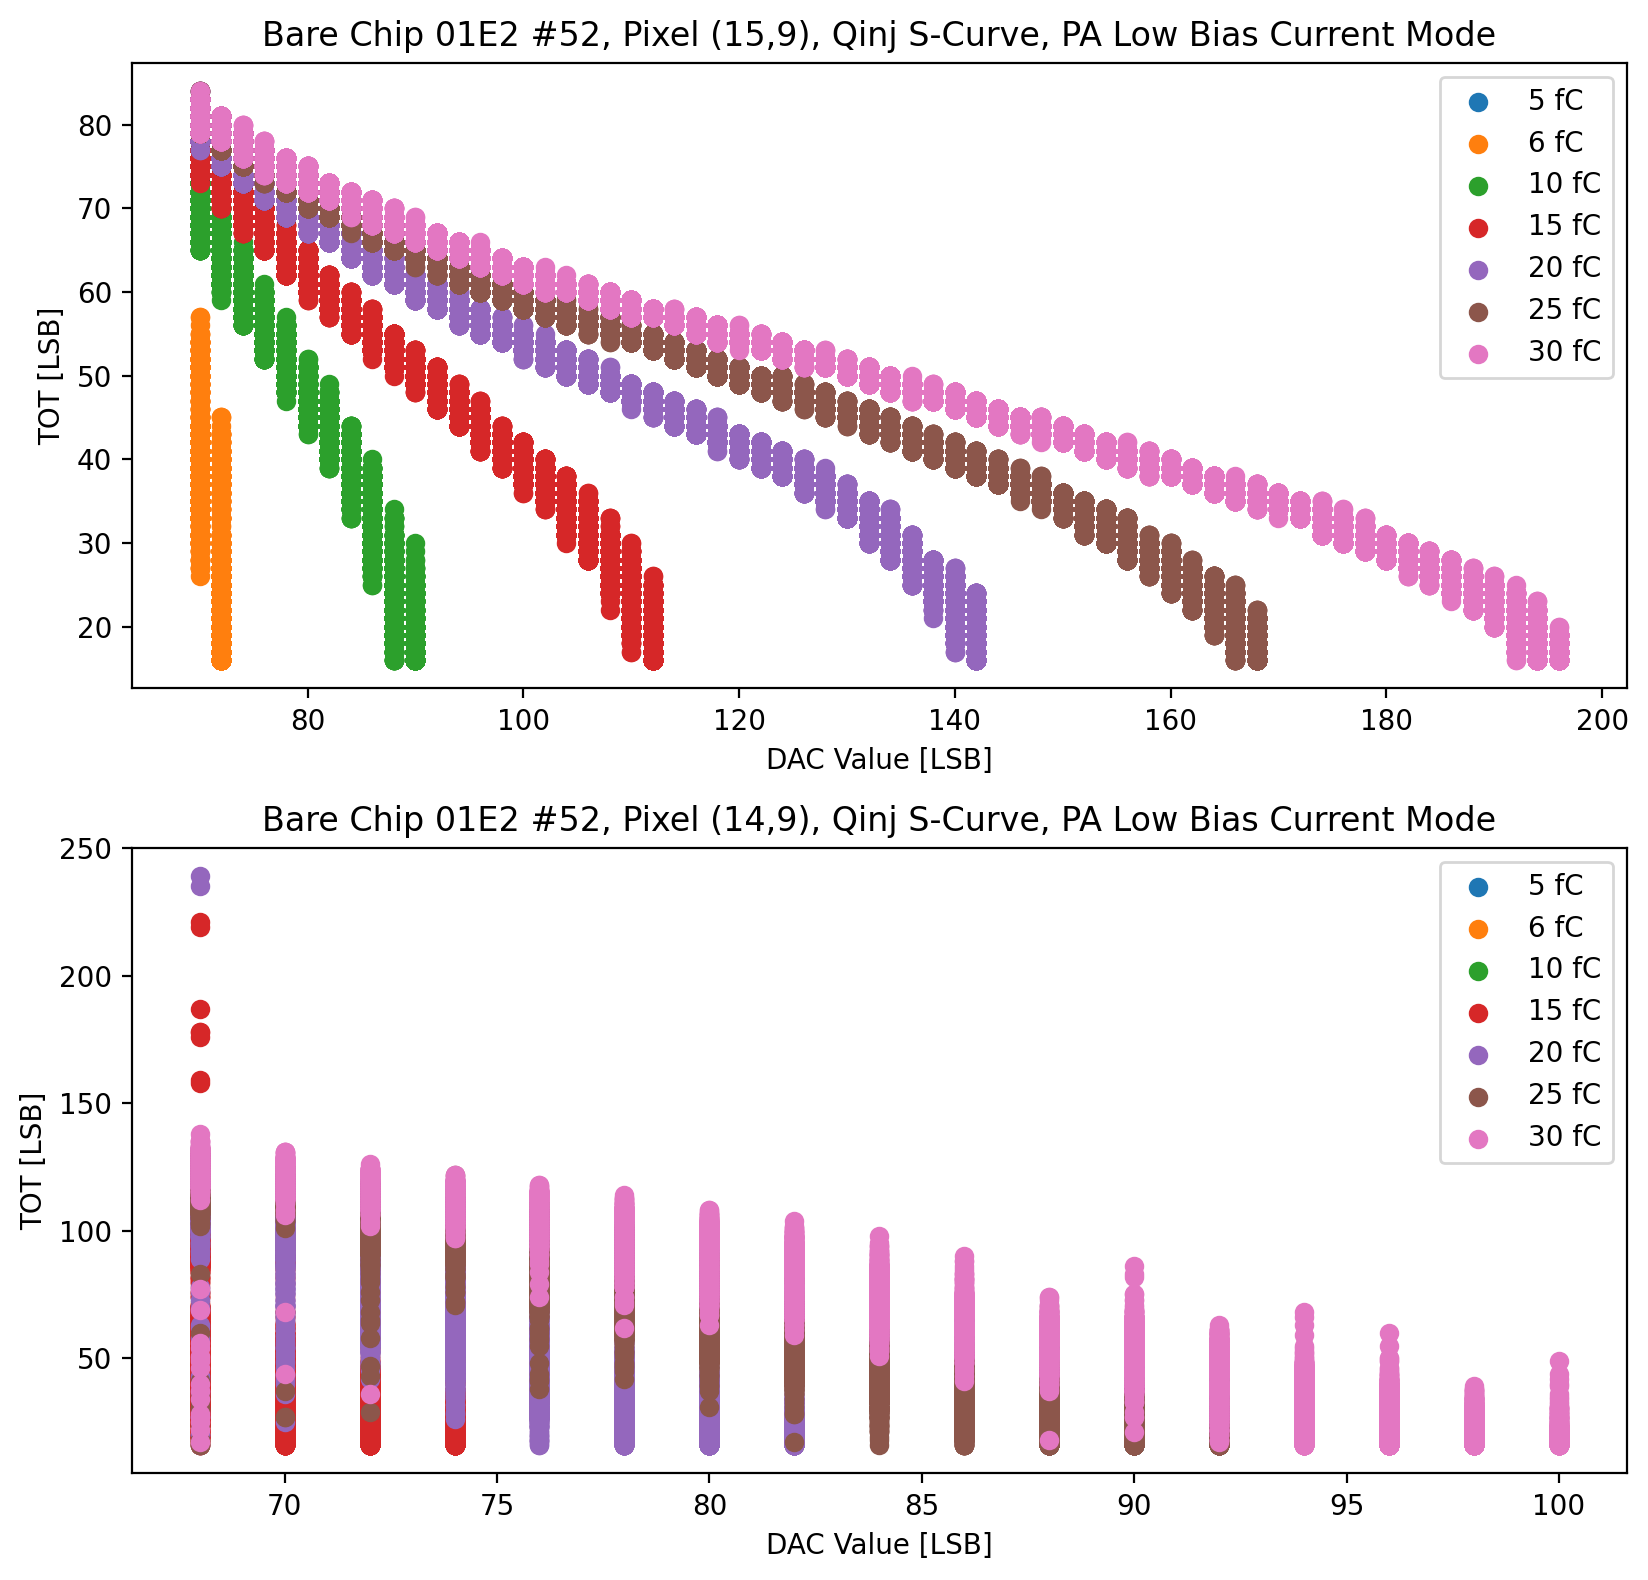

In [75]:
fig = plt.figure(dpi=200, figsize=(16,8))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        for QInj in QInjEns:
            tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
            sp_idx = starting_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj], BL_map_THCal[(row,col)][5][50], NW_map_THCal[(row,col)][5][50])
            selection = (del_[(row,col)]<thresholds[QInj][tp_idx]) & (del_[(row,col)]>=thresholds[QInj][sp_idx+1]) & (qin_[(row,col)]==QInj)
            ax0.scatter(((del_[(row,col)][selection][::4])), (((tot_[(row,col)])[selection][::4])), label=f"{QInj} fC")
        ax0.set_xlabel("DAC Value [LSB]")
        ax0.set_ylabel("TOT [LSB]")
        plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figures/multipixel_tot_raw_scurve.pdf")
plt.show()


125


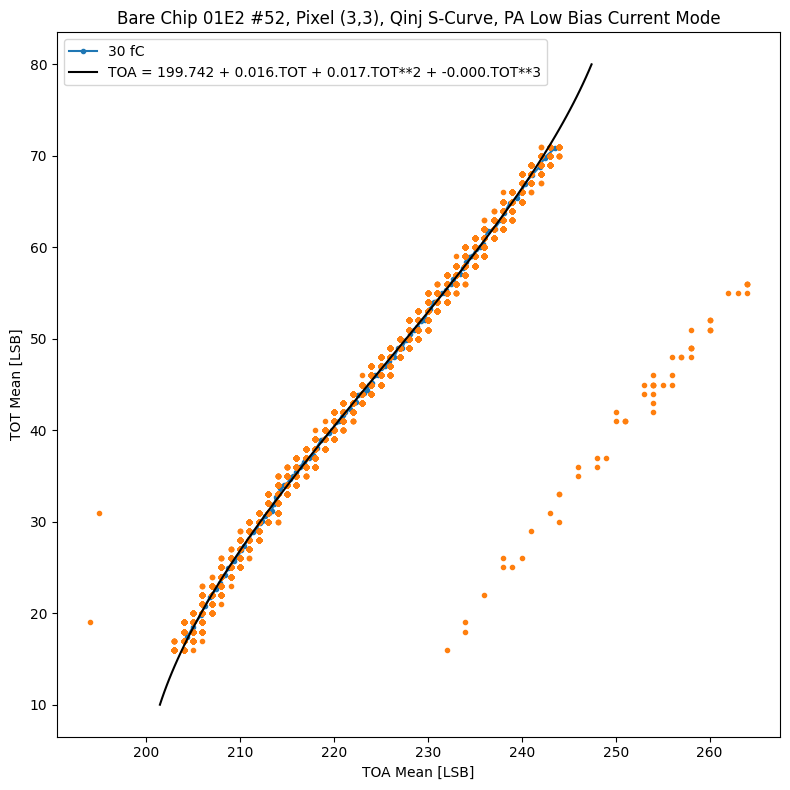

In [385]:
fig = plt.figure(dpi=100, figsize=(8,8))
gs = fig.add_gridspec(1,1)
row = 3
col = 3
QInj = 30
ax0 = fig.add_subplot(gs[0,0])
tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
print(tp_idx)
ax0.plot(np.array(list(TOA_mean[(row,col)][QInj].values()))[15:tp_idx-0], np.array(list(TOT_mean[(row,col)][QInj].values()))[15:tp_idx-0], '.-', label=f"{QInj} fC")
ax0.plot(toa_30fc, tot_30fc, '.')
p, cov = np.polyfit(tot_30fc, toa_30fc, 3, cov = True)
n = tot_30fc.size
x_range = np.linspace(10, 80, 100)
Yest = np.polyval(p, x_range)
ax0.plot(Yest, x_range, 'k-', label=f'TOA = {p[-1]:.3f} + {p[-2]:.3f}.TOT + {p[-3]:.3f}.TOT**2 + {p[-4]:.3f}.TOT**3')
        
ax0.set_xlabel("TOA Mean [LSB]")
ax0.set_ylabel("TOT Mean [LSB]")
plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
plt.legend(loc="upper left")
plt.tight_layout()
# plt.savefig("figures/toa_vs_tot_scurve.pdf")
plt.show()

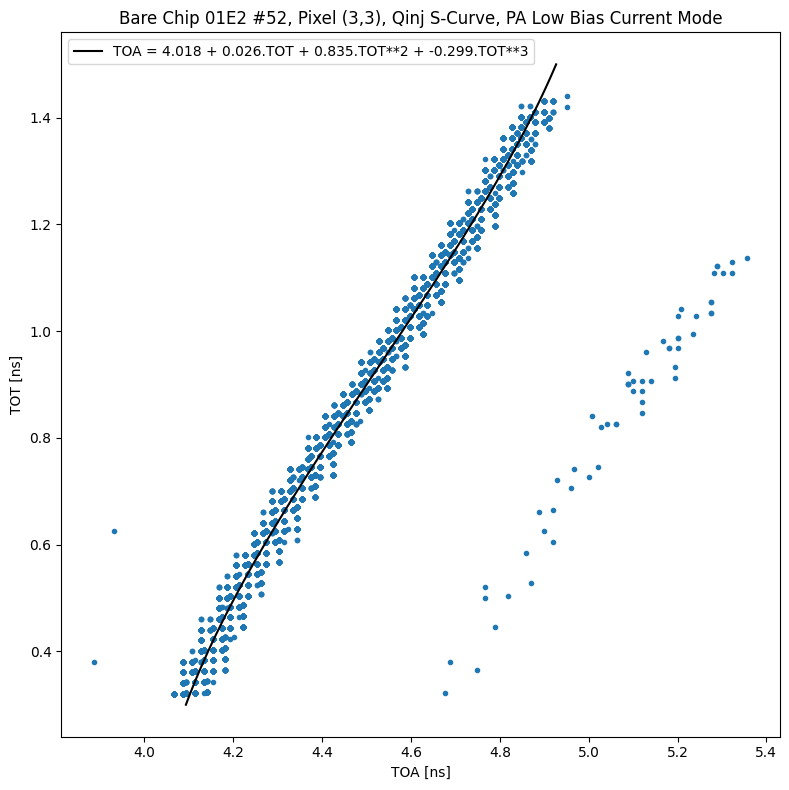

In [386]:
fig = plt.figure(dpi=100, figsize=(8,8))
gs = fig.add_gridspec(1,1)
row = 3
col = 3
QInj = 30
ax0 = fig.add_subplot(gs[0,0])
code_conversion = 3.125/np.array(cal_30fc)
ax0.plot(code_conversion*toa_30fc, code_conversion*tot_30fc, '.')
p, cov = np.polyfit(code_conversion*tot_30fc, code_conversion*toa_30fc, 3, cov = True)
n = tot_30fc.size
x_range = np.linspace(0.3, 1.5, 100)
Yest = np.polyval(p, x_range)
ax0.plot(Yest, x_range, 'k-', label=f'TOA = {p[-1]:.3f} + {p[-2]:.3f}.TOT + {p[-3]:.3f}.TOT**2 + {p[-4]:.3f}.TOT**3')
ax0.set_xlabel("TOA [ns]")
ax0.set_ylabel("TOT [ns]")
plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("figures/toa_vs_tot_scurve.pdf")
plt.show()

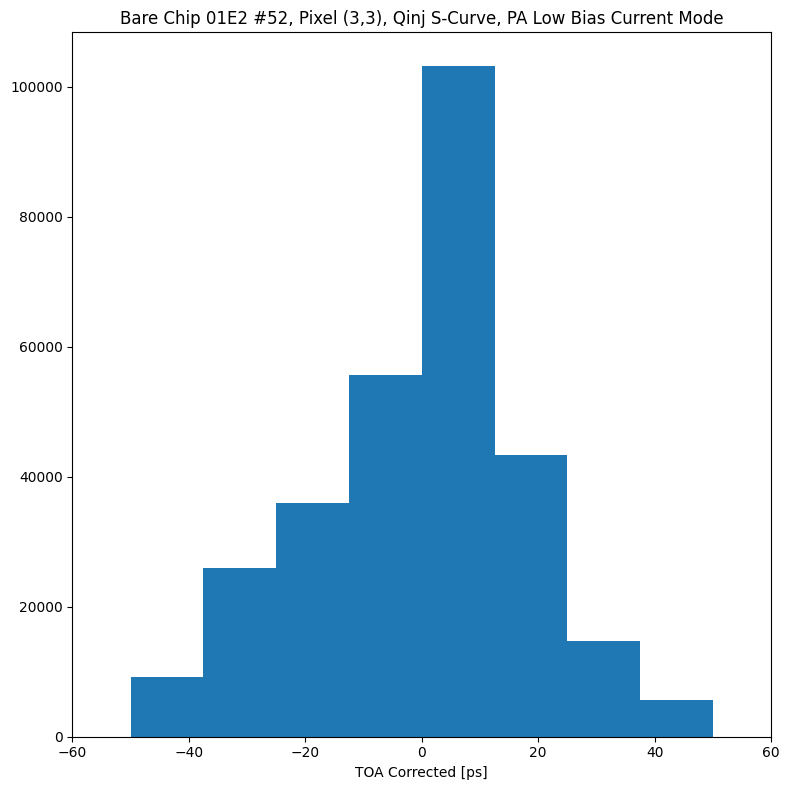

In [398]:
fig = plt.figure(dpi=100, figsize=(8,8))
gs = fig.add_gridspec(1,1)
row = 3
col = 3
QInj = 30
ax = fig.add_subplot(gs[0,0])
Y_resid = 1000*(code_conversion*toa_30fc - np.polyval(p, code_conversion*tot_30fc))
hist_1 = hist.Hist(
    hist.axis.Regular(
        8, -50, 50, name="TOA", label="TOA Corrected [ps]", underflow=False, overflow=False
    )
).fill(Y_resid)
hist_1.project("TOA").plot1d(ax=ax, lw=1, histtype="fill")
ax.set_xticks(ax.get_xticks(),ax.get_xticklabels())
plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
plt.tight_layout()
# plt.savefig("figures/toa_vs_tot_scurve.pdf")
plt.show()

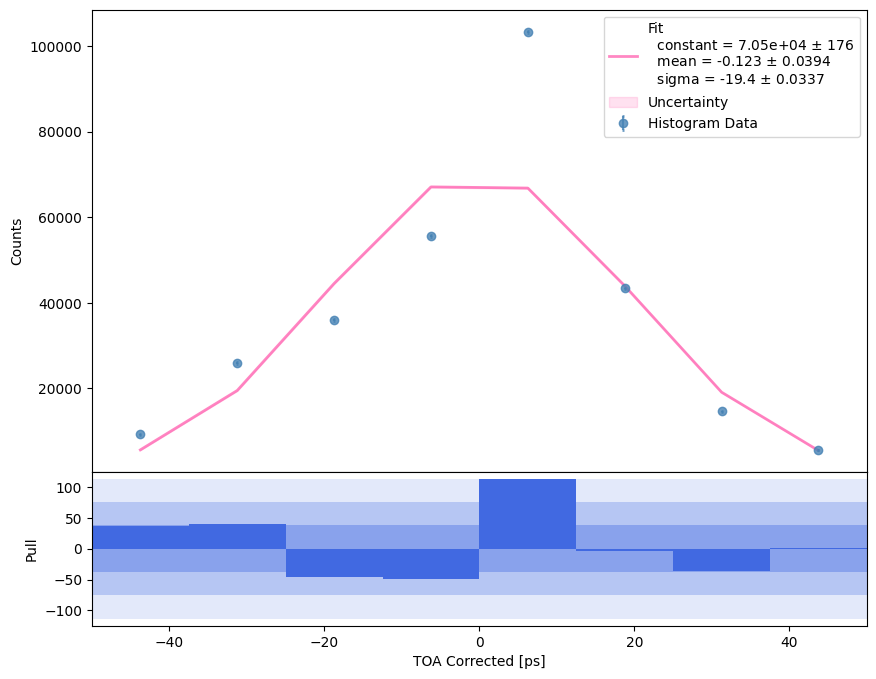

In [399]:
Y_resid = 1000*(code_conversion*toa_30fc - np.polyval(p, code_conversion*tot_30fc))
hist_1 = hist.Hist(
    hist.axis.Regular(
        8, -50, 50, name="TOA", label="TOA Corrected [ps]", underflow=False, overflow=False
    )
).fill(Y_resid)
fig = plt.figure(figsize=(10, 8))
# hist_1.plot_pull("constant*np.exp(-(x-mean)**2. / (2*sigma**2))",
#                 fit_fmt="")
# hist_1.plot_pull("gaus",
#                 fit_fmt=r"{name} = {value:.3g} $\pm$ {error:.3g}")
main_ax_artists, sublot_ax_arists = hist_1.plot_pull(
    "normal",
    fit_fmt=r"{name} = {value:.3g} $\pm$ {error:.3g}",
    eb_ecolor="steelblue",
    eb_mfc="steelblue",
    eb_mec="steelblue",
    eb_fmt="o",
    eb_ms=6,
    eb_capsize=1,
    eb_capthick=2,
    eb_alpha=0.8,
    fp_c="hotpink",
    fp_ls="-",
    fp_lw=2,
    fp_alpha=0.8,
    bar_fc="royalblue",
    pp_num=3,
    pp_fc="royalblue",
    pp_alpha=0.618,
    pp_ec=None,
    ub_alpha=0.2,
)

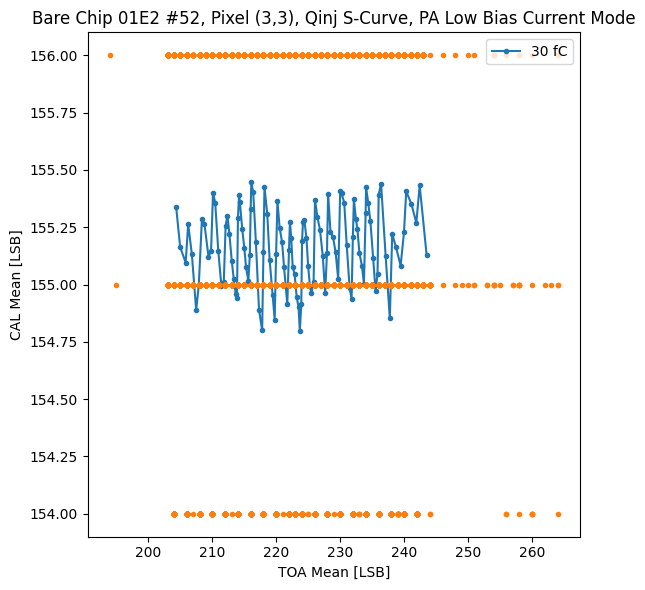

In [389]:
fig = plt.figure(dpi=100, figsize=(6,6))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        QInj = 30
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
        ax0.plot(np.array(list(TOA_mean[(row,col)][QInj].values()))[15:tp_idx-0], np.array(list(CAL_mean[(row,col)][QInj].values()))[15:tp_idx-0], '.-', label=f"{QInj} fC")
        ax0.plot(toa_30fc, cal_30fc, '.')
        ax0.set_xlabel("TOA Mean [LSB]")
        ax0.set_ylabel("CAL Mean [LSB]")
        plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figures/toa_vs_cal_scurve.pdf")
plt.show()

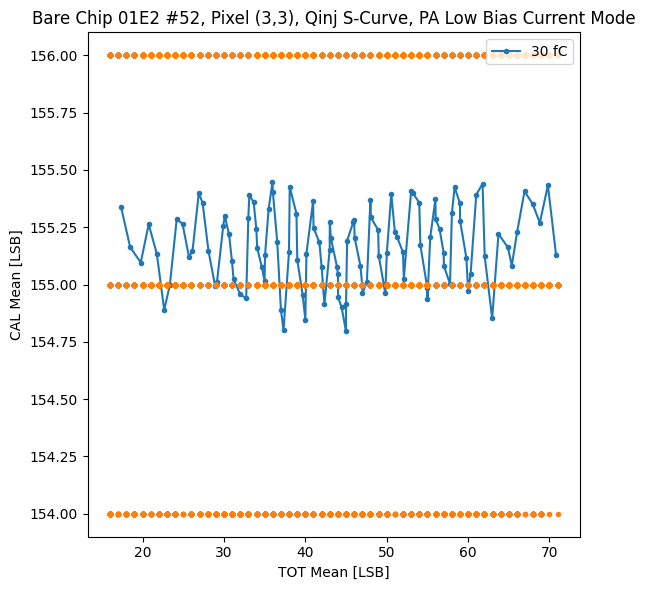

In [390]:
fig = plt.figure(dpi=100, figsize=(6,6))
gs = fig.add_gridspec(len(scan_list),len(scan_list))
u_cl = np.sort(np.unique(col_list))
u_rl = np.sort(np.unique(row_list))
for ri,row in enumerate(u_rl):
    for ci,col in enumerate(u_cl):
        QInj = 30
        ax0 = fig.add_subplot(gs[len(u_rl)-ri-1,len(u_cl)-ci-1])
        tp_idx = turning_point(np.array(list(hit_counts[(row,col)][QInj].values())), thresholds[QInj])
        ax0.plot(np.array(list(TOT_mean[(row,col)][QInj].values()))[15:tp_idx-0], np.array(list(CAL_mean[(row,col)][QInj].values()))[15:tp_idx-0], '.-', label=f"{QInj} fC")
        ax0.plot(tot_30fc, cal_30fc, '.')
        ax0.set_xlabel("TOT Mean [LSB]")
        ax0.set_ylabel("CAL Mean [LSB]")
        plt.title(f"Bare Chip 01E2 #52, Pixel ({row},{col}), Qinj S-Curve, PA Low Bias Current Mode")
        plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("figures/tot_vs_cal_scurve.pdf")
plt.show()